In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#-> Importing Libraries
import numpy as np         #-> Mathematical operations  
import pandas as pd        #-> Data manipulation
from matplotlib import pyplot as plt     #-> Visualization
import seaborn as sns                    #-> Visualization
from sklearn.model_selection import train_test_split           # Splitting data into training and testing

In [ ]:
#-> Load the data-set
df=pd.read_csv("/content/drive/MyDrive/my kaggle/auto_insurance-industry/train(1).csv")

Features belonging to a similar group have names such as ind, reg, car, and calc. Bin or cat is appended at the end to indicate binary features or categorical features. Columns not labeled above are continuous or ordinal data. -1 indicates missing values. The Target column indicates whether the policyholder has an insurance claim


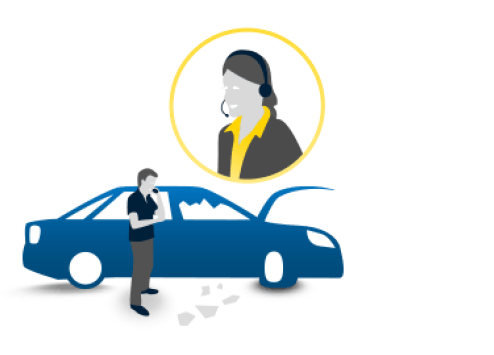

In [ ]:
#-> Display top of dataFrame
df.head()

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
0              0              0              1              0  ...   
1              0              0              0              1  ...   
2              0              0              0              1  ...   
3              0              1              0              0  ...   
4              0              1              0              0  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5           8               0   
1           3           1           1           9               0   
2           4           2           7           7               0   
3           2           2           4           9               0   
4           3           1           1           3               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   
1               1               1               0               1   
2               1               1               0               1   
3               0               0               0               0   
4               0               0               1               1   

   ps_calc_20_bin  
0               1  
1               0  
2               0  
3               0  
4               0  

[5 rows x 59 columns]

In [ ]:
#-> Display bottom of dataframe
df.tail()

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
595207  1488013       0          3              1         10              0   
595208  1488016       0          5              1          3              0   
595209  1488017       0          1              1         10              0   
595210  1488021       0          5              2          3              1   
595211  1488027       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
595207              0              0              0              0  ...   
595208              0              0              0              0  ...   
595209              0              1              0              0  ...   
595210              0              0              0              1  ...   
595211              0              1              0              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
595207           4           1           9           6               0   
595208           4           1           3           8               1   
595209           3           2           2           6               0   
595210           4           1           4           2               0   
595211           4           4           3           8               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
595207               1               1               0               1   
595208               0               1               0               1   
595209               0               1               0               0   
595210               1               1               1               0   
595211               1               0               0               0   

        ps_calc_20_bin  
595207               1  
595208               1  
595209               0  
595210               0  
595211               0  

[5 rows x 59 columns]

In [ ]:
#-> Display the numbers of rows & columnns in the dataframe
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 595212 rows and 59 columns


In [ ]:
#-> Display the number of unique values in a Data-set column
df.nunique().sort_values(ascending=False)

id                595212
ps_car_13          70482
ps_reg_03           5013
ps_car_14            850
ps_car_12            184
ps_car_11_cat        104
ps_calc_10            26
ps_calc_14            24
ps_calc_11            20
ps_reg_02             19
ps_car_06_cat         18
ps_car_15             15
ps_ind_15             14
ps_calc_13            14
ps_car_01_cat         13
ps_ind_03             12
ps_calc_12            11
ps_calc_08            11
ps_calc_06            11
ps_calc_02            10
ps_reg_01             10
ps_calc_03            10
ps_car_04_cat         10
ps_calc_07            10
ps_calc_01            10
ps_ind_01              8
ps_ind_05_cat          8
ps_calc_09             8
ps_calc_05             7
ps_calc_04             6
ps_car_09_cat          6
ps_car_11              5
ps_ind_14              5
ps_ind_02_cat          5
ps_car_07_cat          3
ps_car_10_cat          3
ps_car_05_cat          3
ps_car_03_cat          3
ps_ind_04_cat          3
ps_ind_09_bin          2


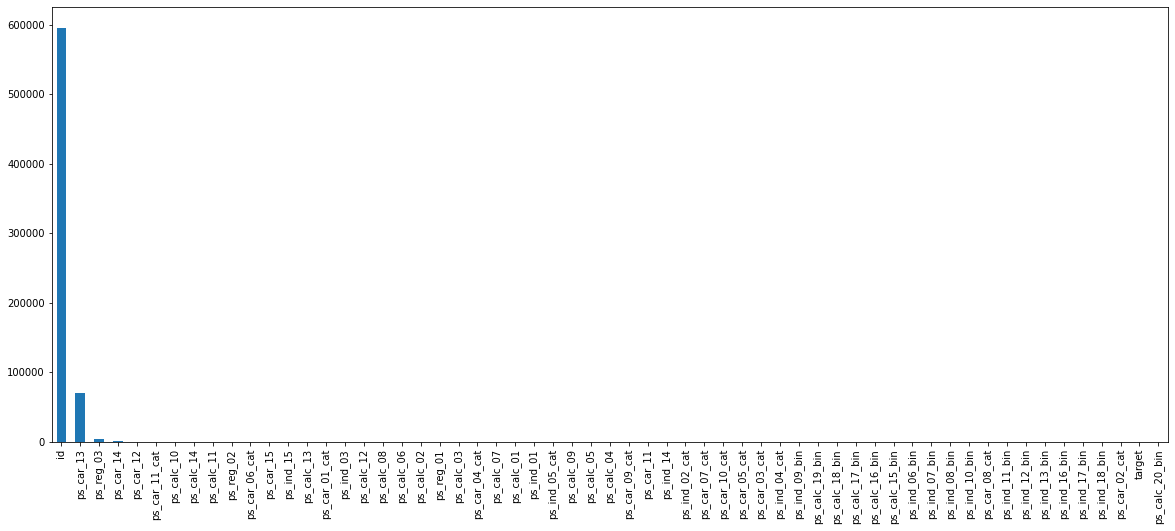

In [ ]:
#-> Visually display the number of unique values in a Data-set column
df.nunique().sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
#-> Data Types and Missing Values

# See the column data types and non-missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

According to the Graph there is no Null value present in the Data-set

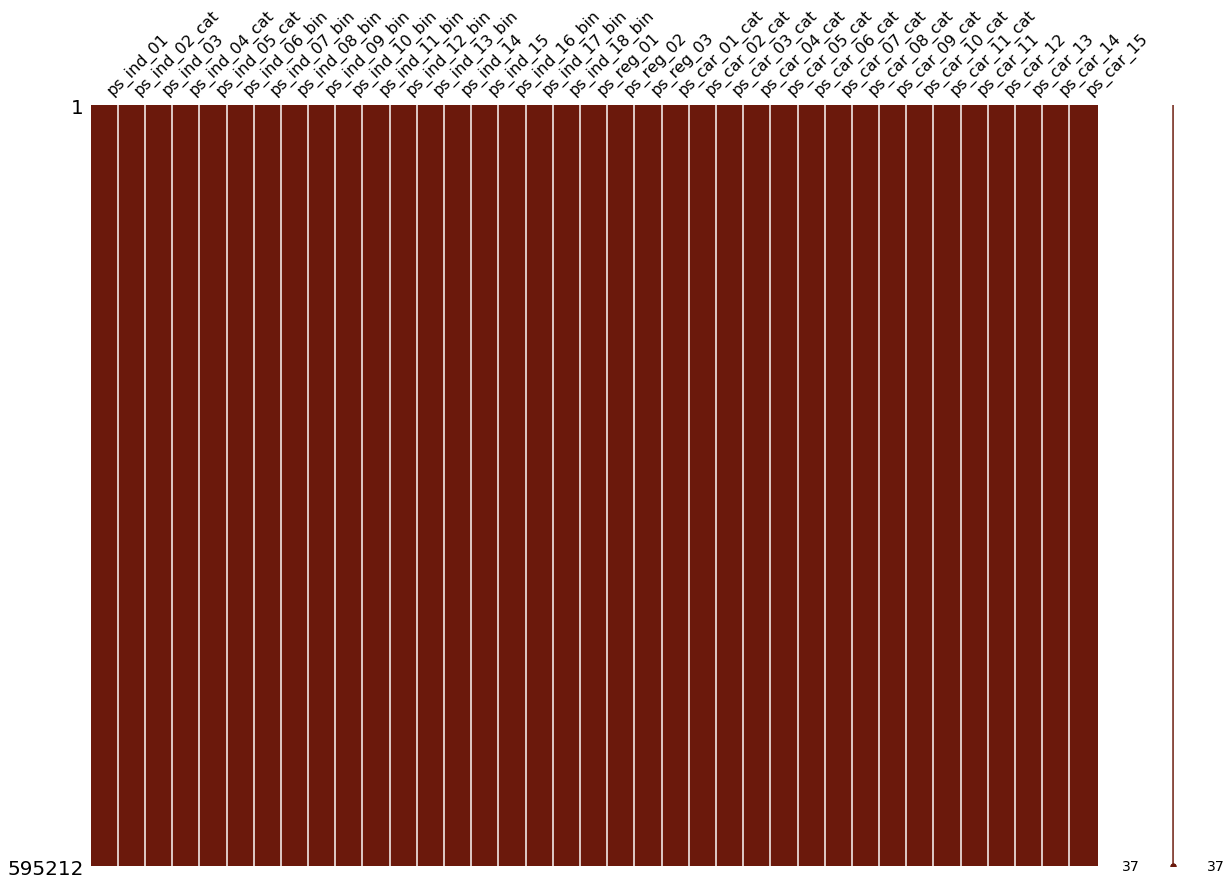

In [ ]:
#-> Now let's use a package called Missingno which is useful for visualizing null values.
import missingno as msno

msno.matrix(df=df.iloc[:, 2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

In [ ]:
df.select_dtypes(include=['object']).head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [ ]:
col=df.filter(like='_bin').columns.tolist()


In [ ]:
# Display the head of categorical Column
df[col].nunique()
col[:5]

['ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin']

In [ ]:
df[col]=df[col].replace({1:True,0:False})
df[col].describe()

ps_ind_06_bin ps_ind_07_bin ps_ind_08_bin ps_ind_09_bin ps_ind_10_bin  \
count         595212        595212        595212        595212        595212   
unique             2             2             2             2             2   
top            False         False         False         False         False   
freq          360852        442223        497644        484917        594990   

       ps_ind_11_bin ps_ind_12_bin ps_ind_13_bin ps_ind_16_bin ps_ind_17_bin  \
count         595212        595212        595212        595212        595212   
unique             2             2             2             2             2   
top            False         False         False          True         False   
freq          594205        589594        594648        393330        523143   

       ps_ind_18_bin ps_calc_15_bin ps_calc_16_bin ps_calc_17_bin  \
count         595212         595212         595212         595212   
unique             2              2              2              2   
top            False          False           True           True   
freq          503879         522342         373698         329856   

       ps_calc_18_bin ps_calc_19_bin ps_calc_20_bin  
count          595212         595212         595212  
unique              2              2              2  
top             False          False          False  
freq           424278         387469         503955

In [ ]:
claim1=df.loc[df['target']==1]
claim0=df.loc[df['target']==0][:20742]
ndf= pd.concat([claim0, claim1])
df=ndf.sample(frac=1,random_state=42)
df.head()

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
17527   43944       0          2              1          4              0   
4738    12142       0          2              2          2              1   
685      1779       0          5              1          5              0   
87870  219844       1          1              1          5              0   
2630     6740       0          5              3          5              1   

       ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
17527              0           True          False          False  ...   
4738               0          False          False          False  ...   
685                0          False          False          False  ...   
87870              0           True          False          False  ...   
2630               0          False           True          False  ...   

       ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
17527           8           1           0           5           False   
4738            3           1           5           5           False   
685             2           0           3           3           False   
87870           3           2           2           3           False   
2630            9           0           2           7           False   

       ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
17527            True            True           False            True   
4738             True            True           False           False   
685              True            True           False           False   
87870           False           False           False           False   
2630            False            True           False           False   

       ps_calc_20_bin  
17527           False  
4738            False  
685             False  
87870            True  
2630            False  

[5 rows x 59 columns]

In [ ]:
claim0.shape, claim1.shape

((20742, 59), (21694, 59))

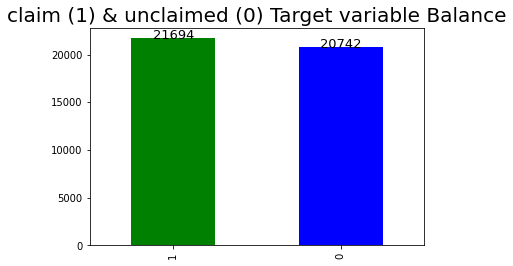

In [ ]:
#-> Checking the data is Balanced or Not
plt.title('claim (1) & unclaimed (0) Target variable Balance', fontsize=20)
graph = df.target.value_counts().plot(kind='bar',color=('green','blue'))
for p in graph .patches:
    height= p.get_height()
    graph.text(p.get_x() + p.get_width() / 2, height + 0.2, height, ha = "center", fontsize=13 )

In [ ]:
list(df.columns)

['id',
 'target',
 'ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [ ]:
#-> Getting the data Type of every colomn in the Data-set
df.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin        bool
ps_ind_07_bin        bool
ps_ind_08_bin        bool
ps_ind_09_bin        bool
ps_ind_10_bin        bool
ps_ind_11_bin        bool
ps_ind_12_bin        bool
ps_ind_13_bin        bool
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin        bool
ps_ind_17_bin        bool
ps_ind_18_bin        bool
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

In [ ]:
#-> Statistics for each column
df.describe

<bound method NDFrame.describe of              id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
17527     43944       0          2              1          4              0   
4738      12142       0          2              2          2              1   
685        1779       0          5              1          5              0   
87870    219844       1          1              1          5              0   
2630       6740       0          5              3          5              1   
...         ...     ...        ...            ...        ...            ...   
6500      16606       0          6              1         11              0   
11722     29490       0          1              4          7              0   
478438  1195574       1          1              2          0              1   
895        2332       0          2              2          6              0   
16414     41210       0          0              2          0              1   

        ps_ind_05

In [ ]:
### Now let's prepare lists of numeric, categorical and binary columns
# All features
all_features = df.columns.tolist()
all_features.remove('target')
# Numeric Features
numeric_features = [x for x in all_features if x[-3:] not in ['bin', 'cat']]
# Categorical Features
categorical_features = [x for x in all_features if x[-3:]=='cat']
# Binary Features
binary_features = [x for x in all_features if x[-3:]=='bin']

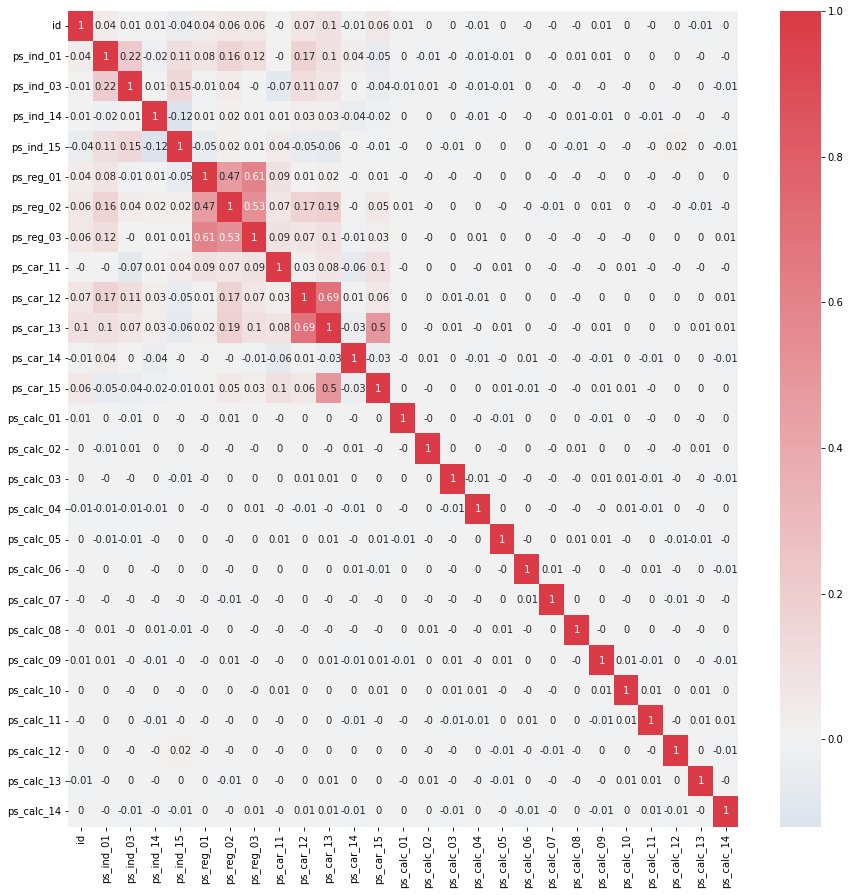

In [ ]:
### Corralation matrix heatmap
# Getting correlation matrix
cor_matrix = df[numeric_features].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

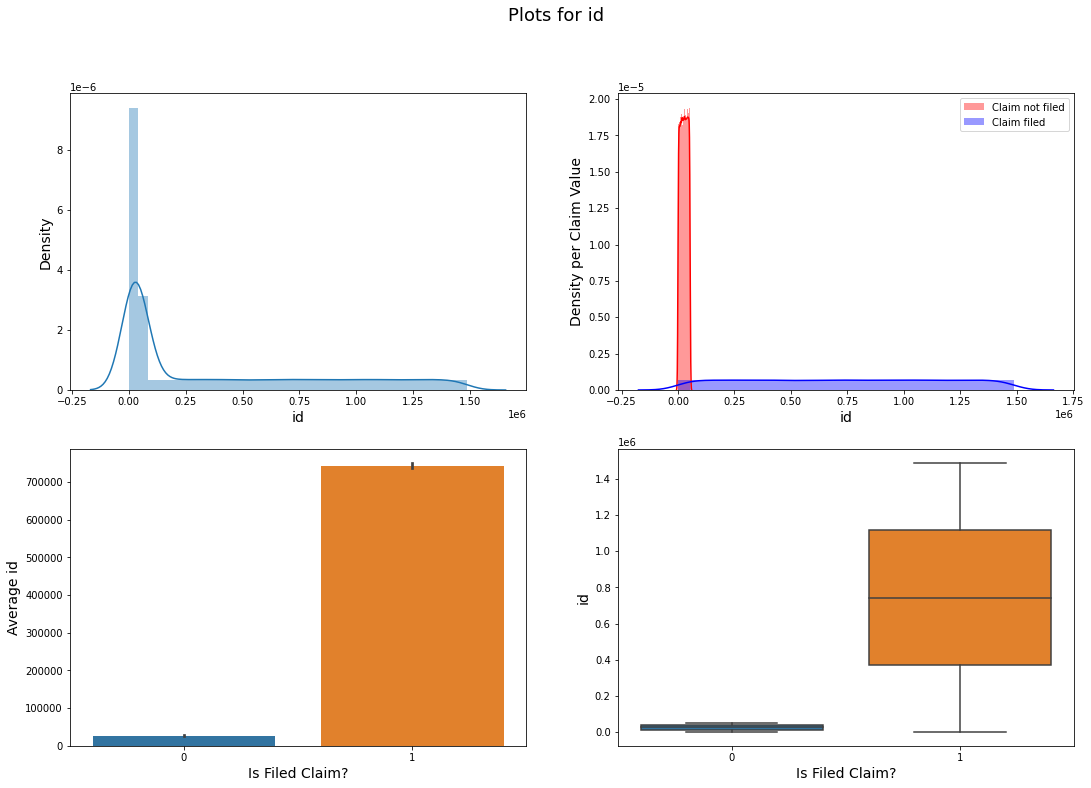

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

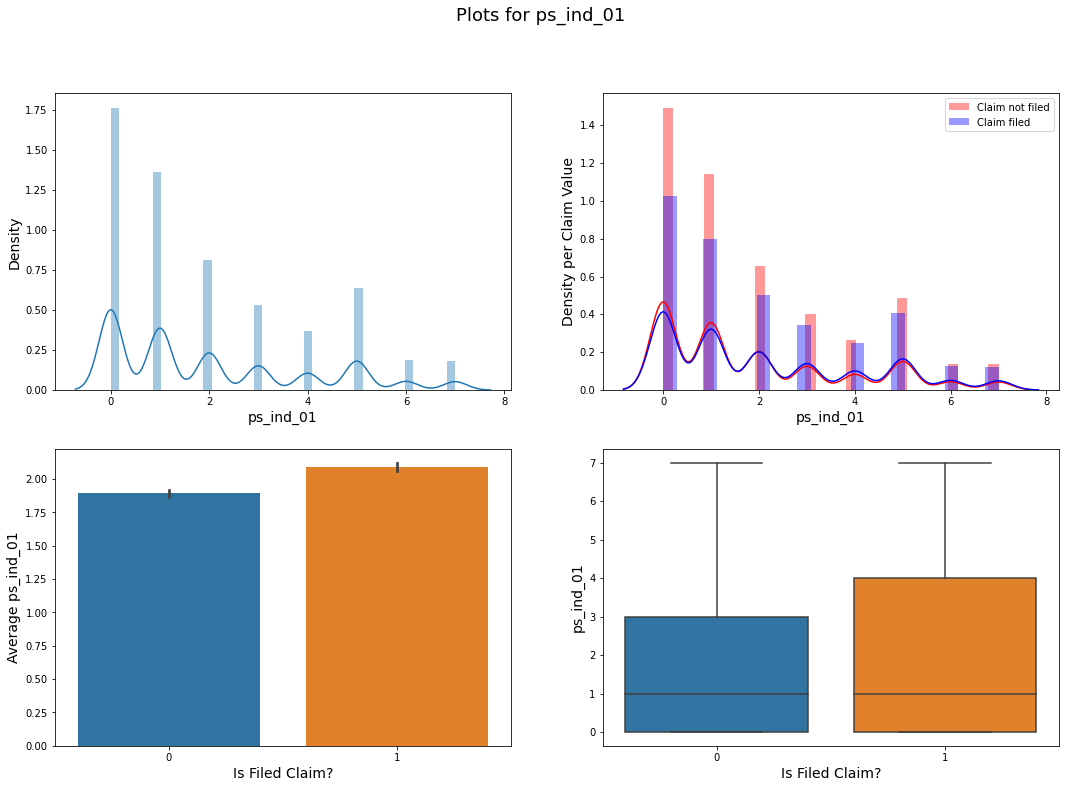

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

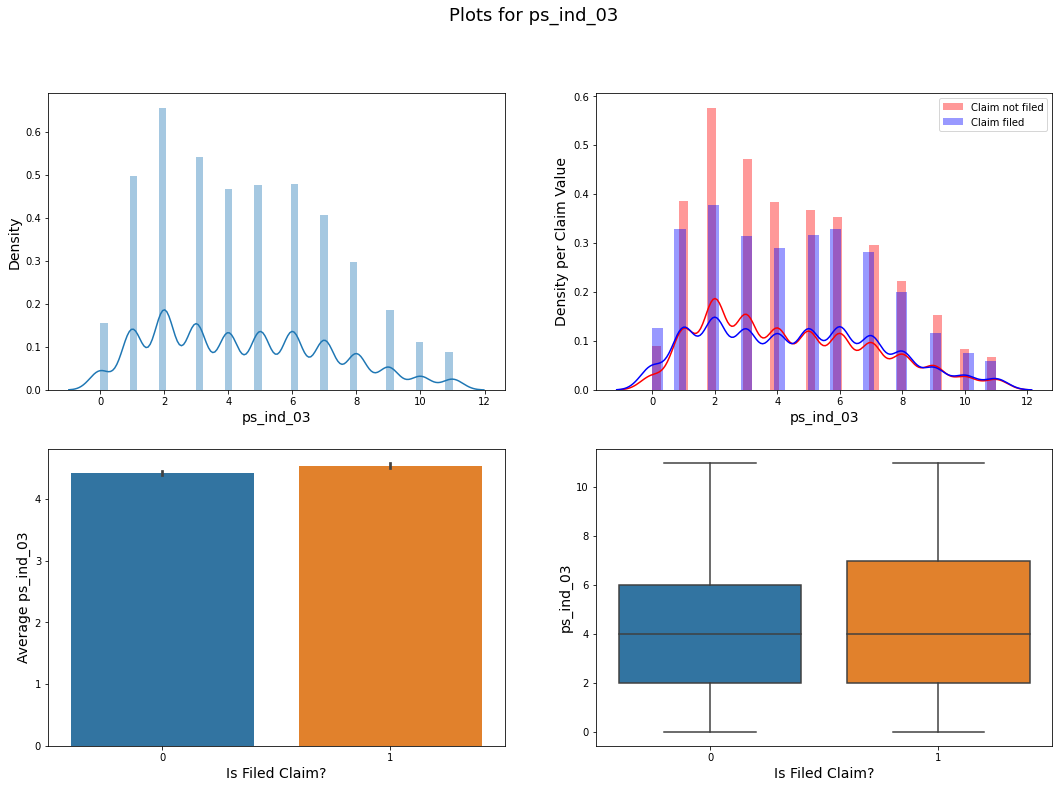

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

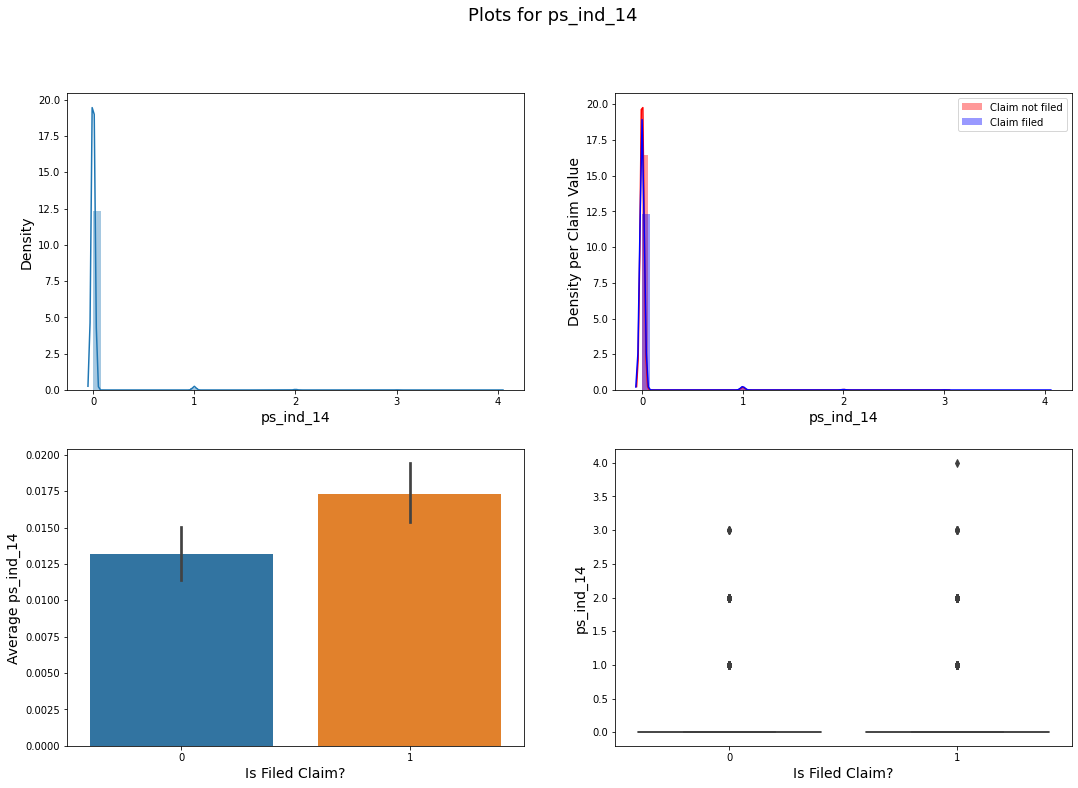

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

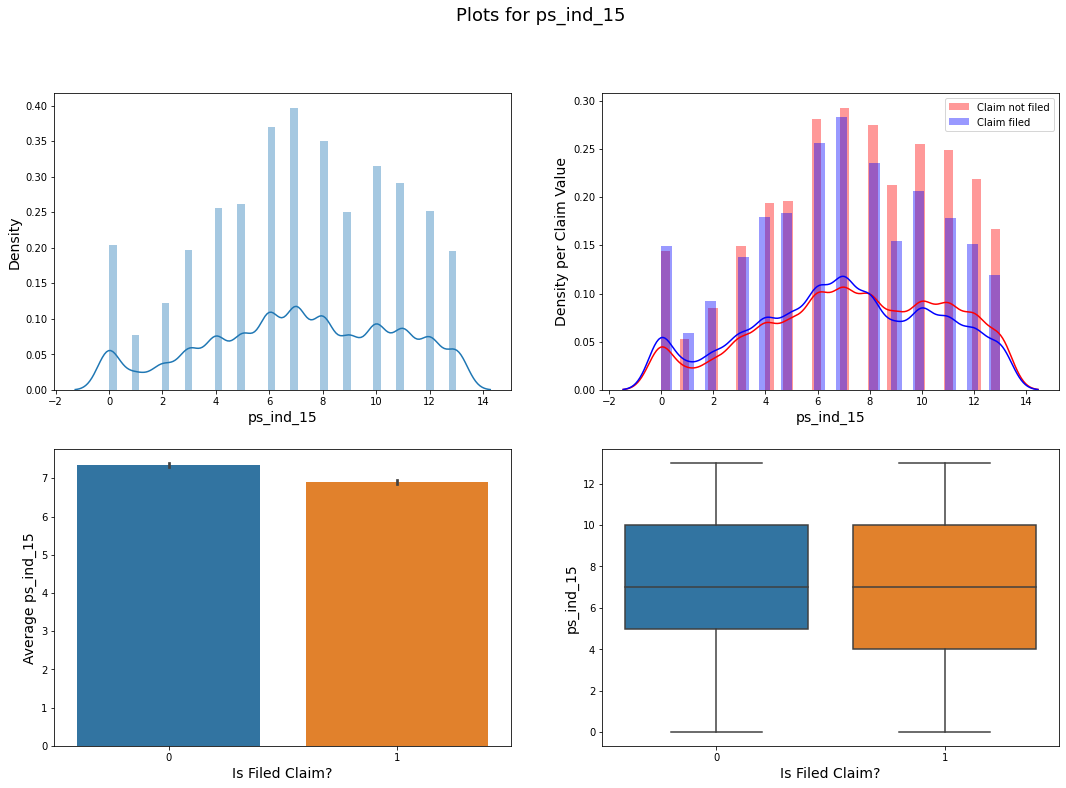

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

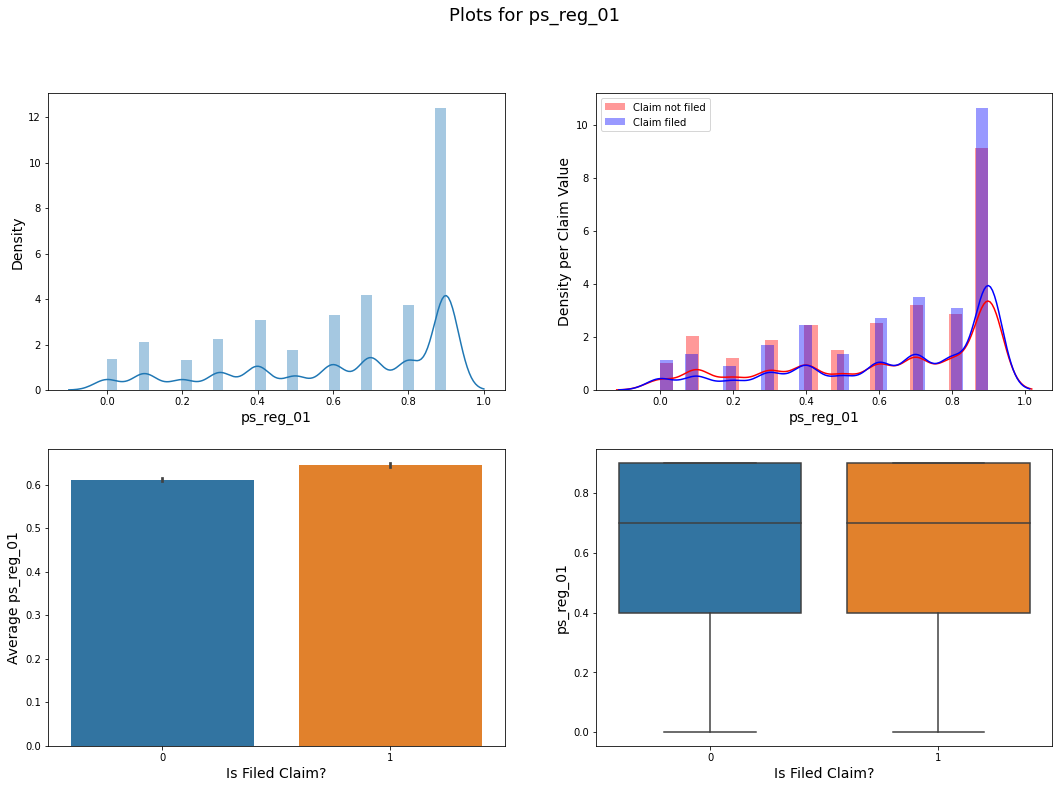

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

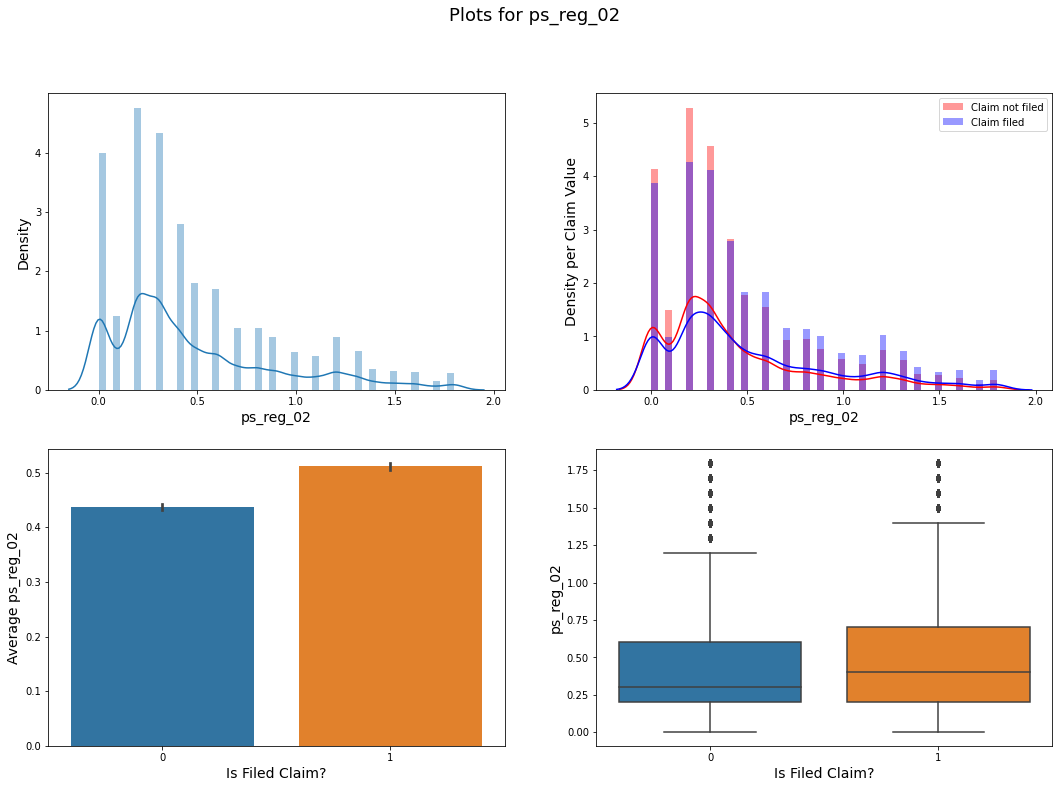

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

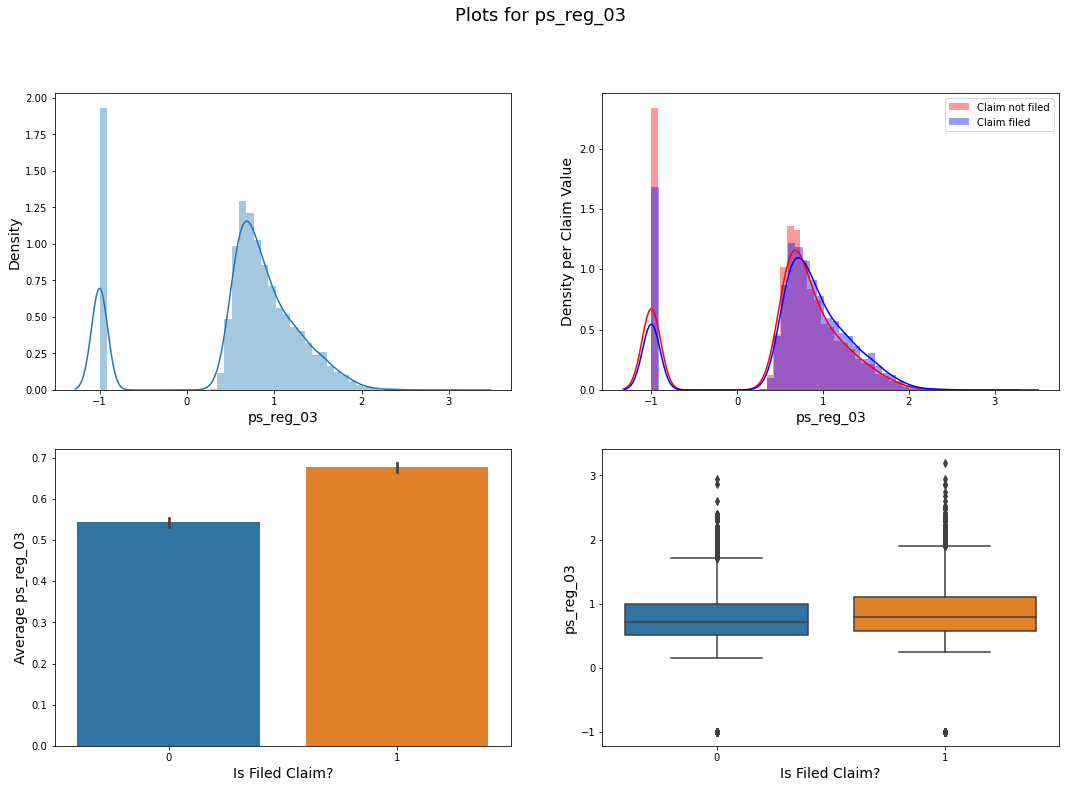

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

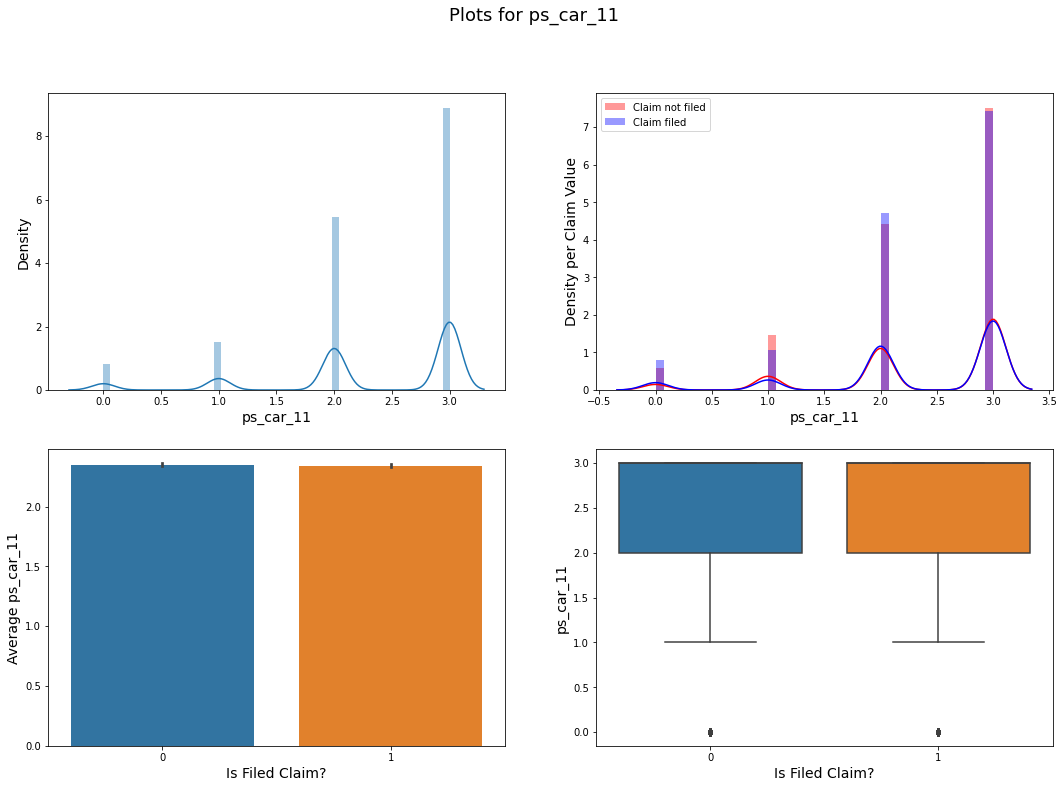

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

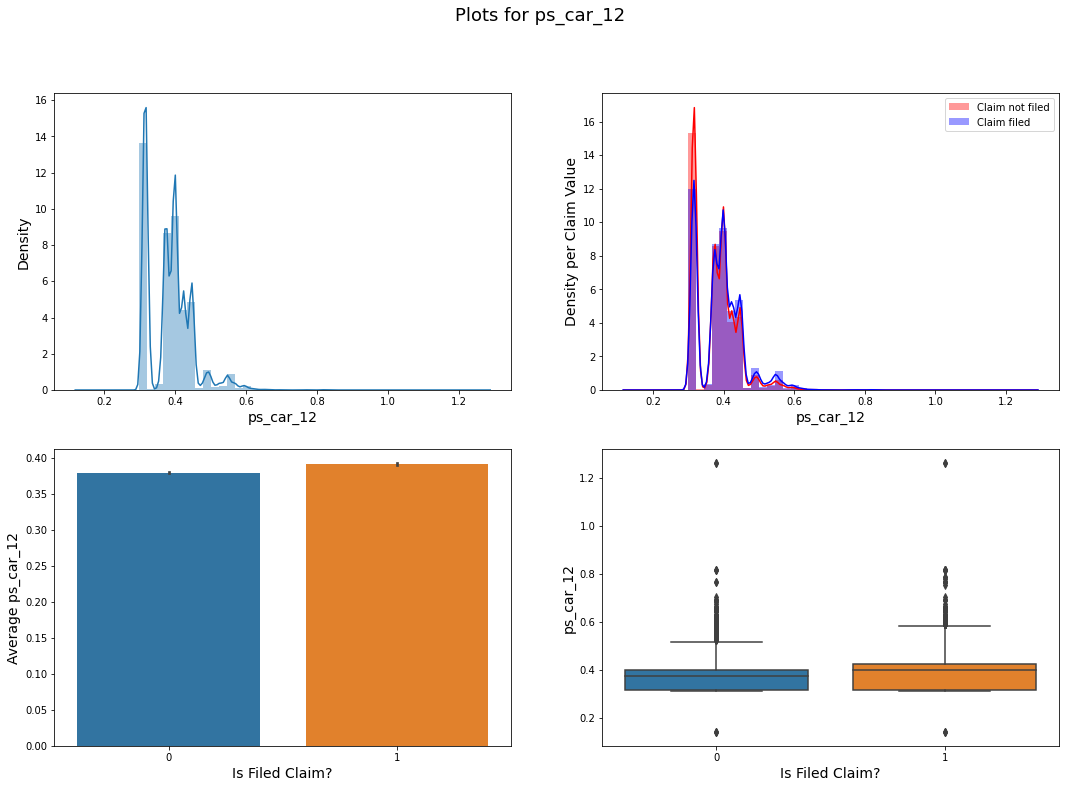

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

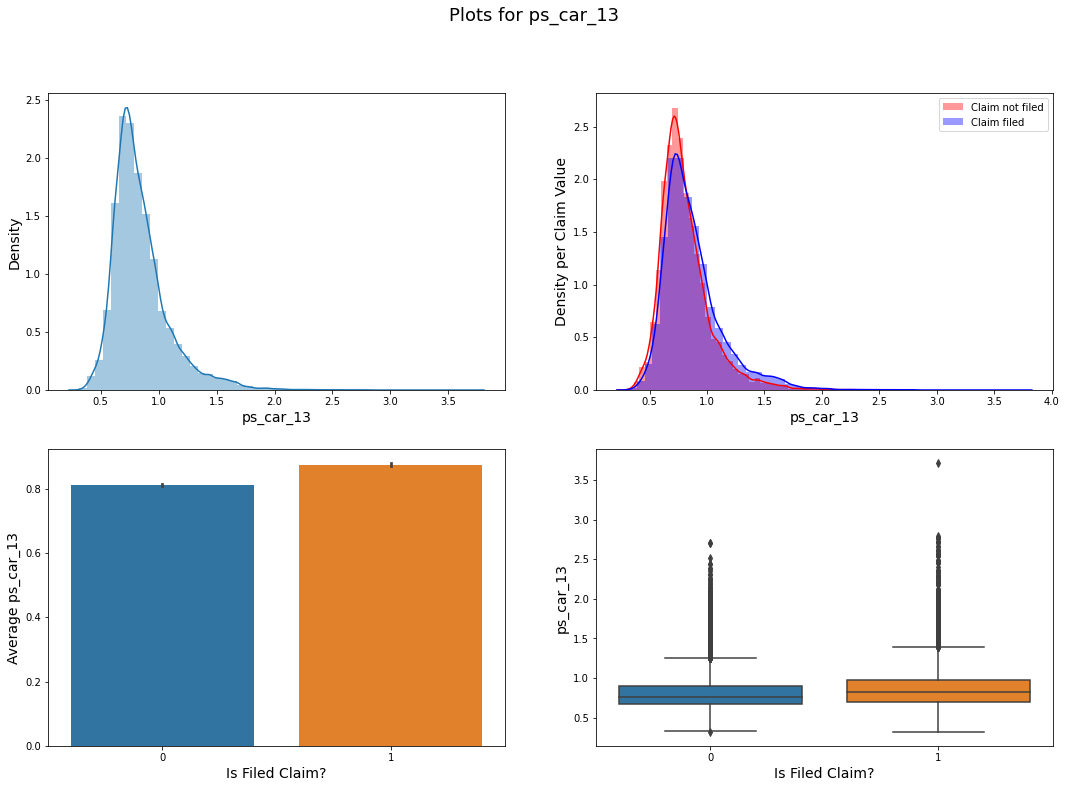

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

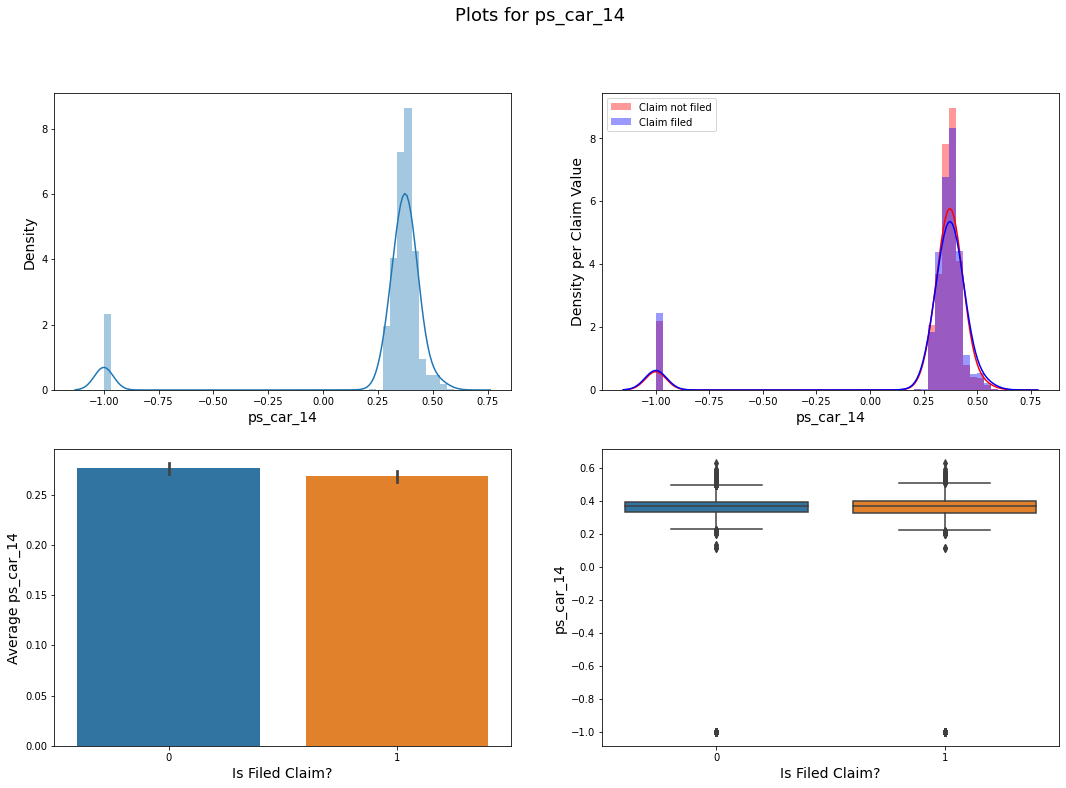

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

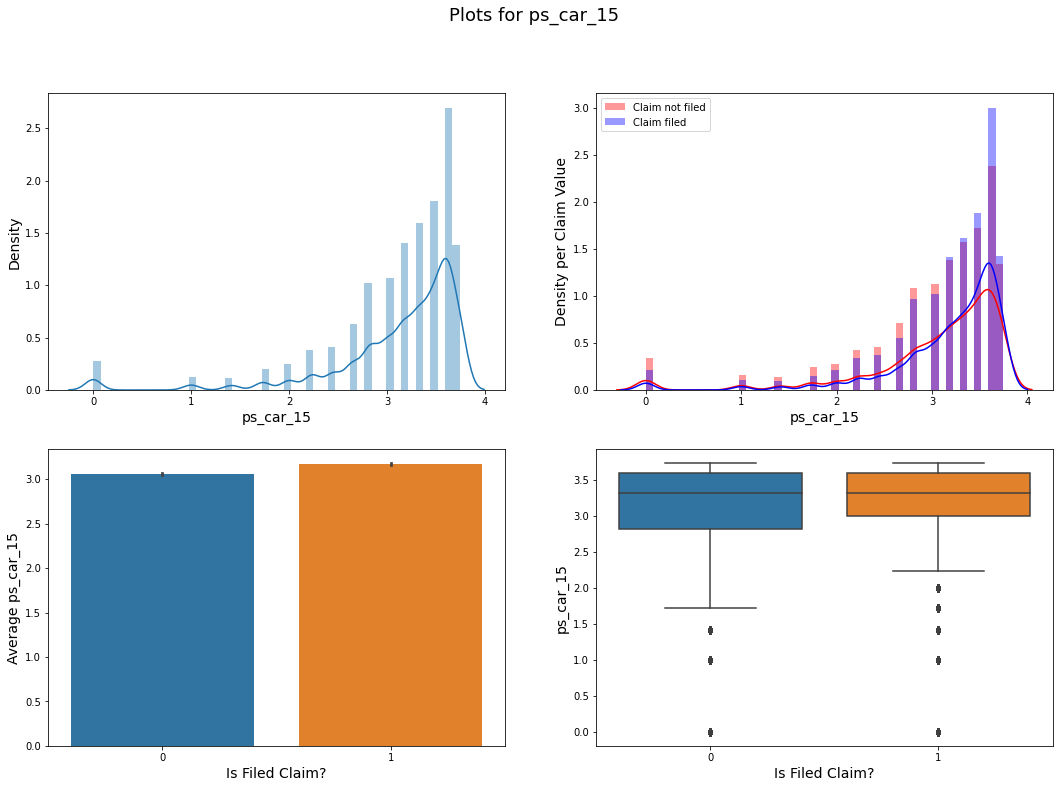

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

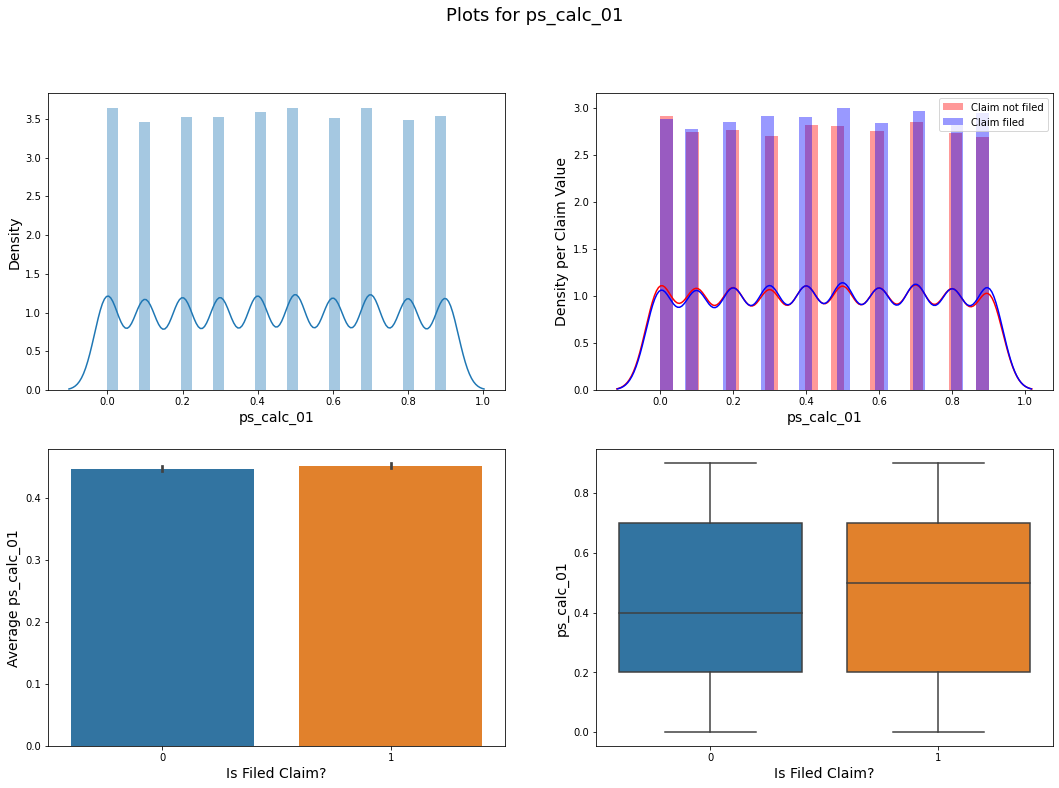

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

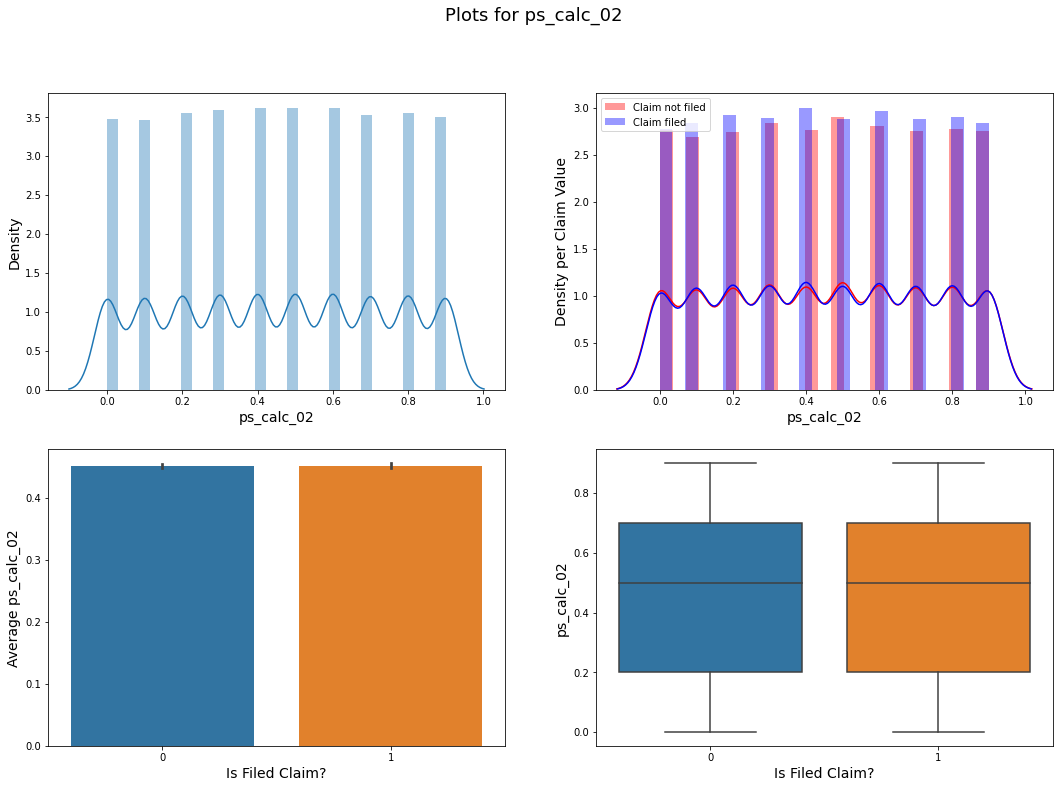

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

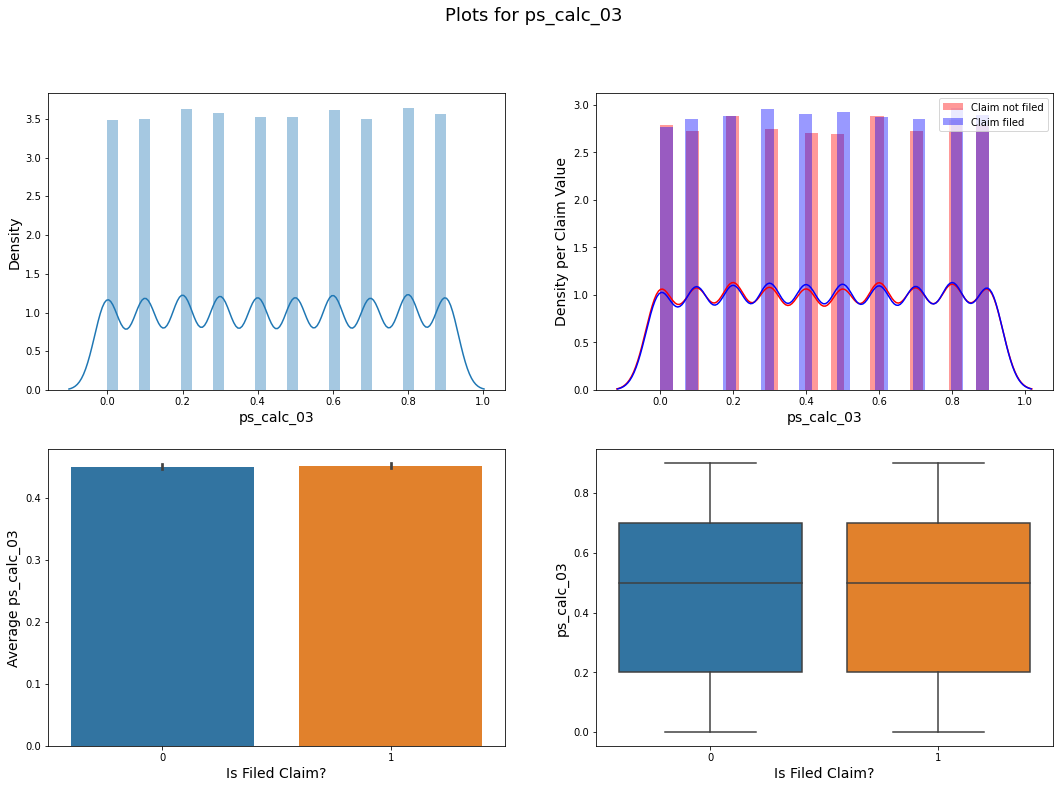

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

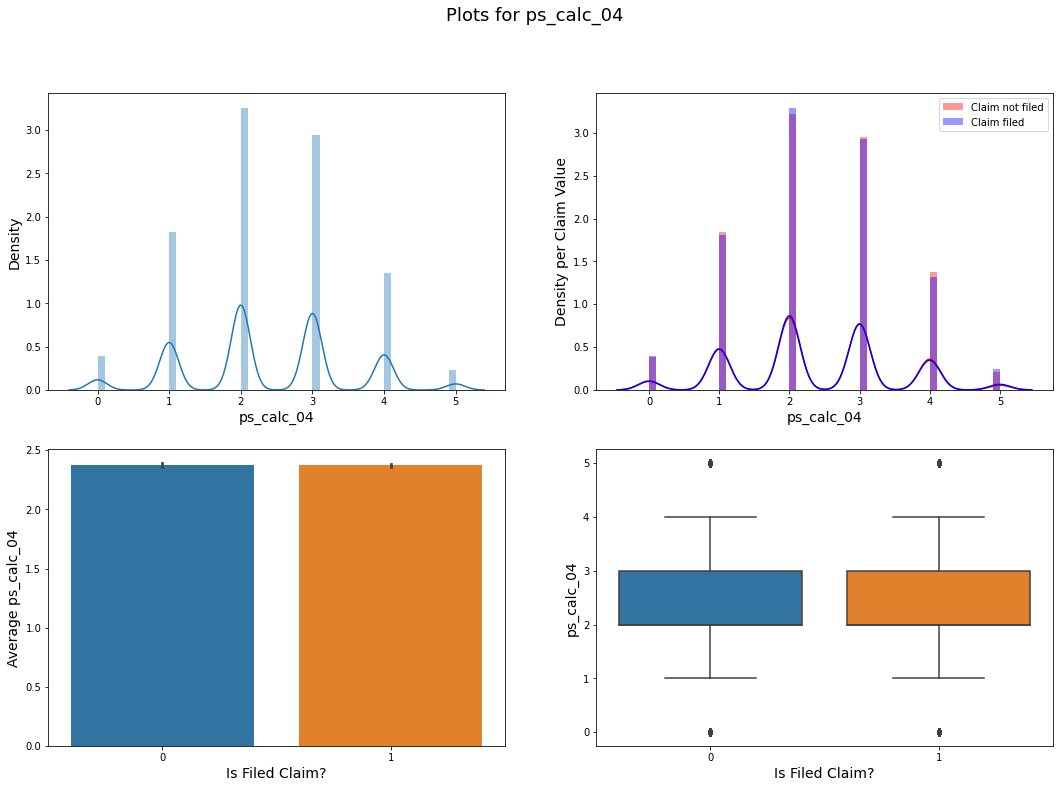

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

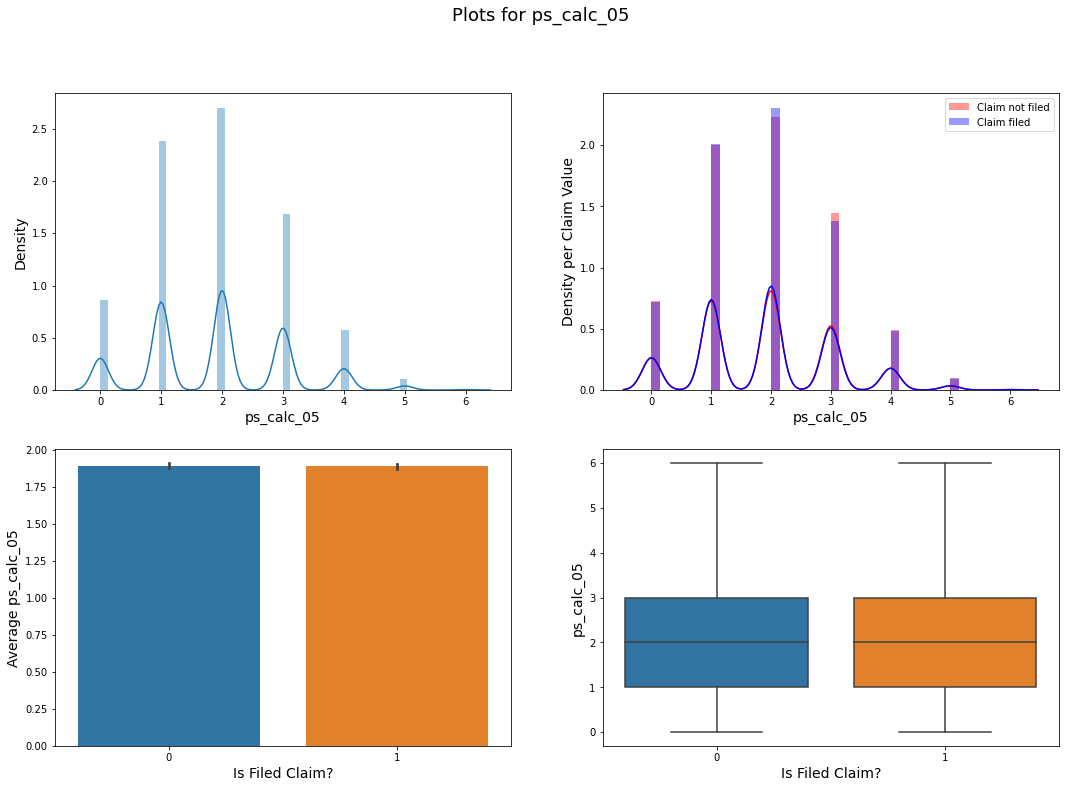

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

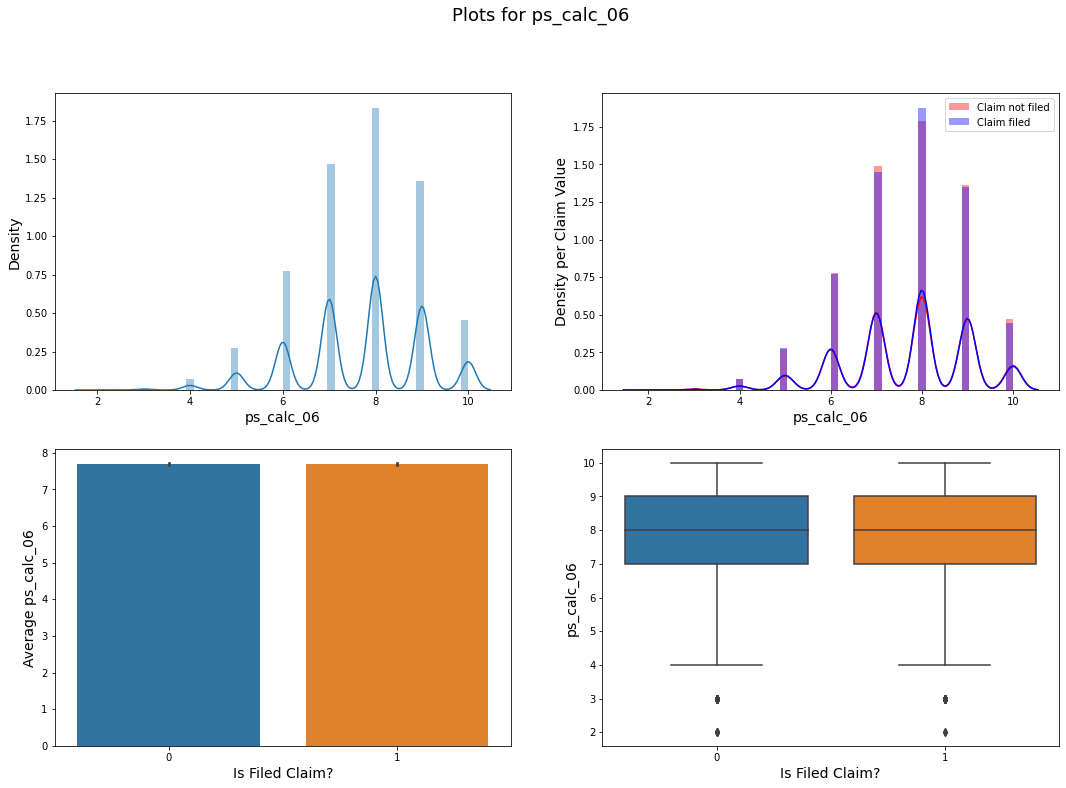

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

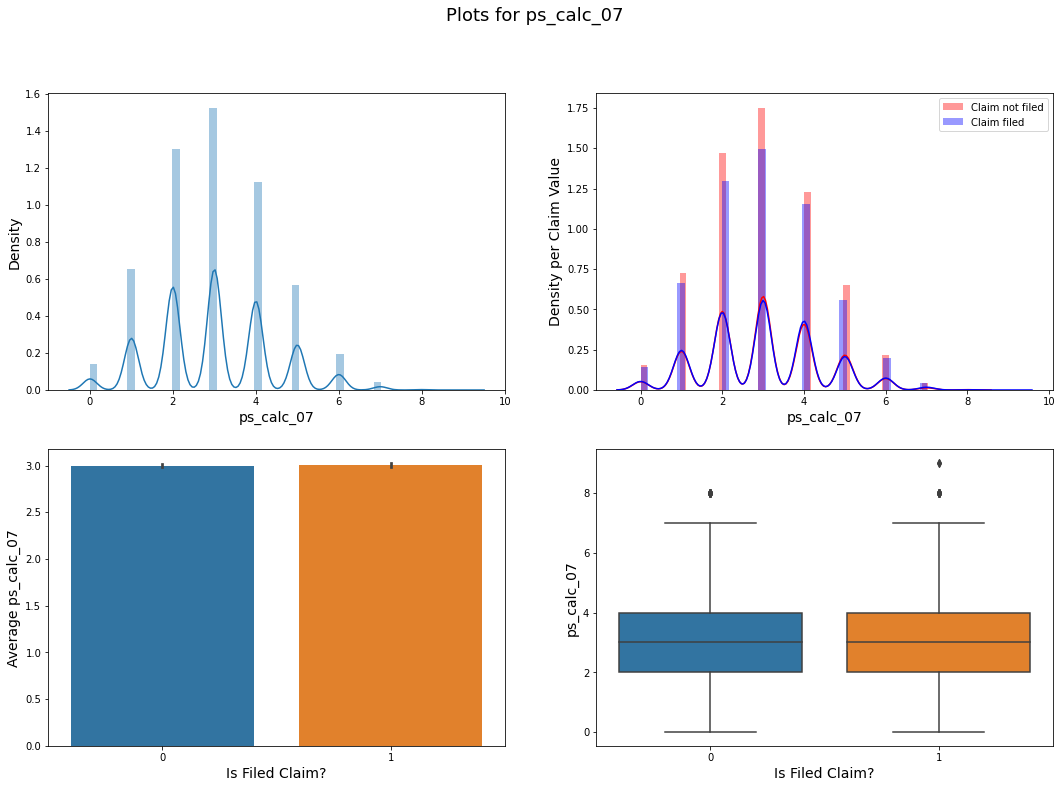

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

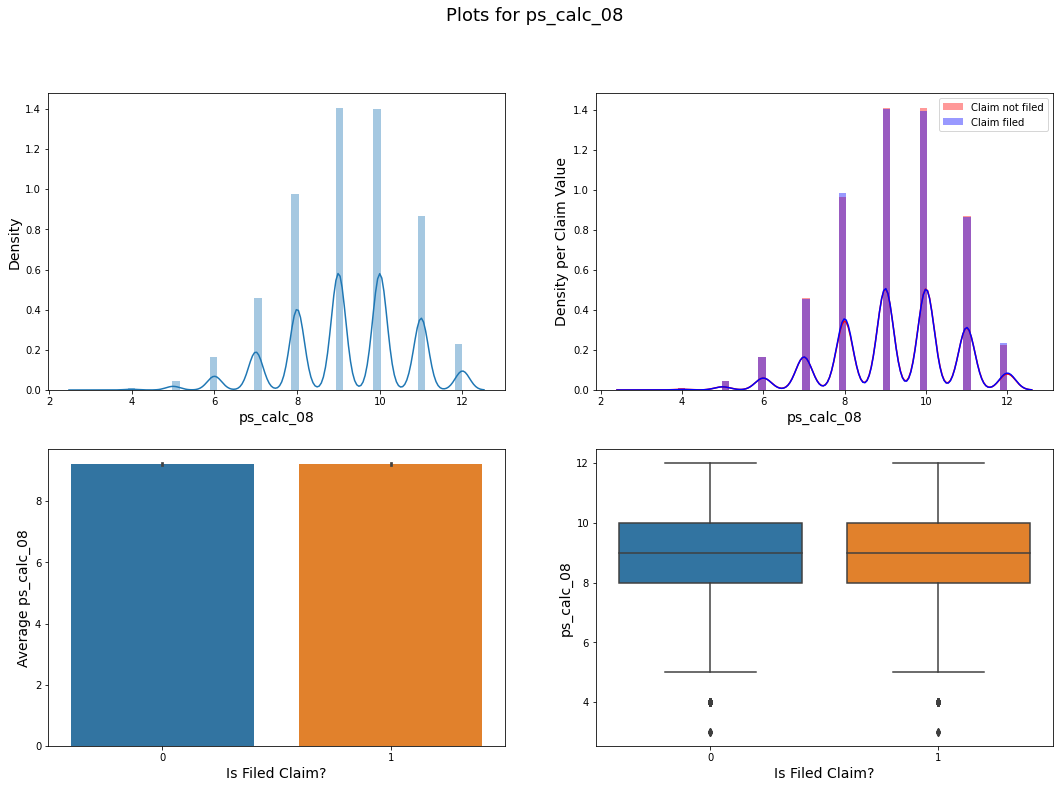

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

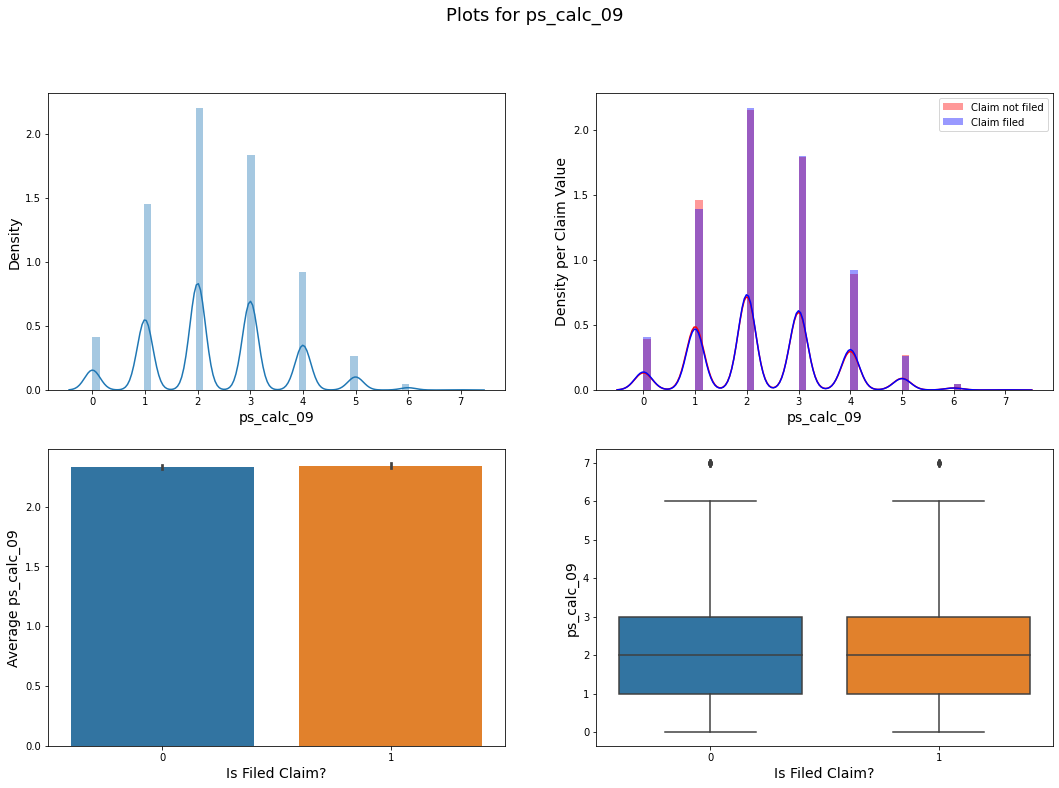

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

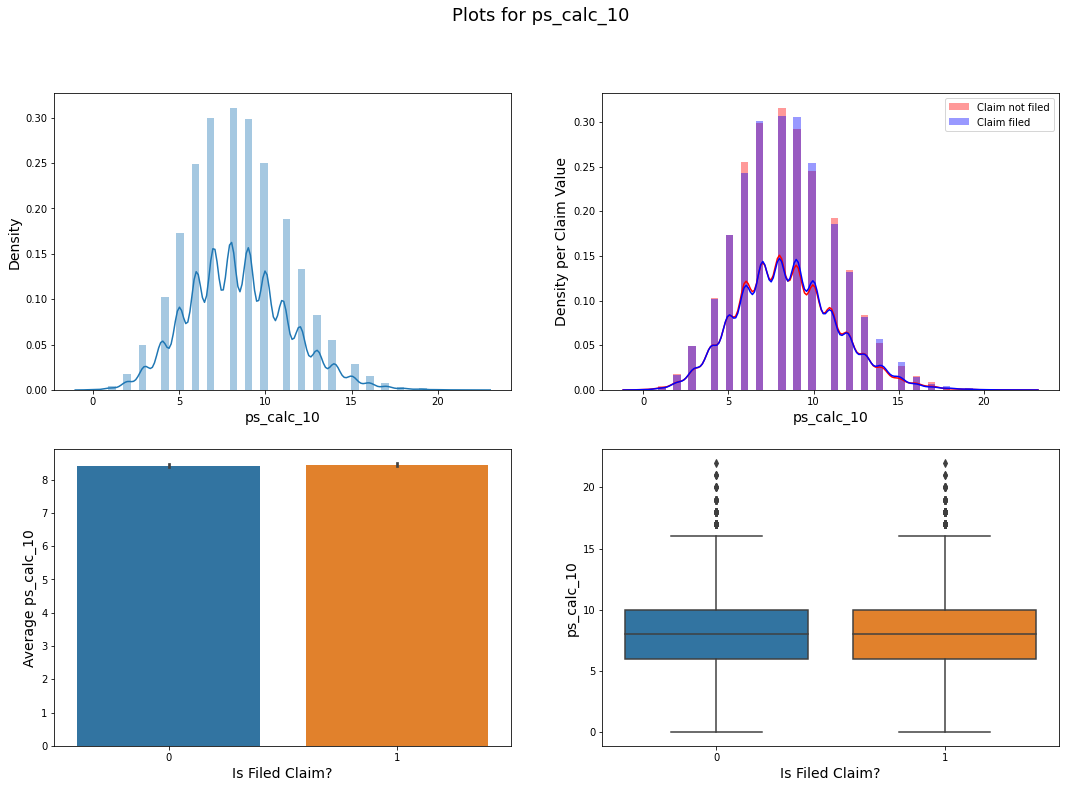

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

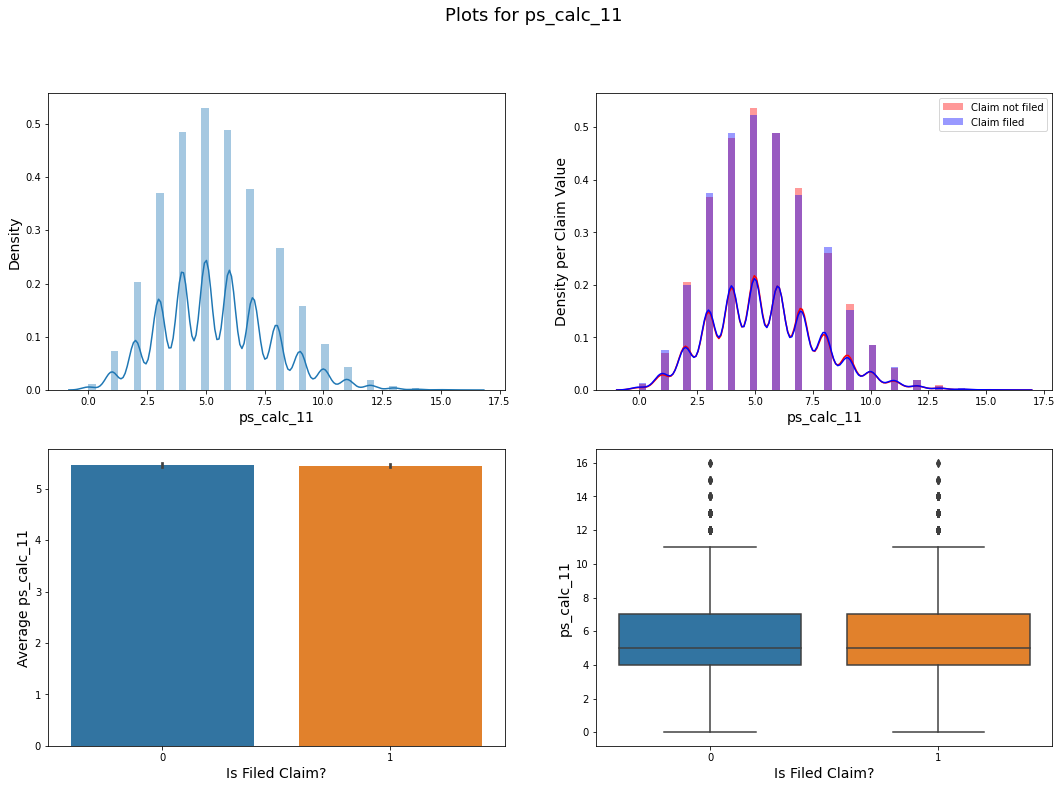

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

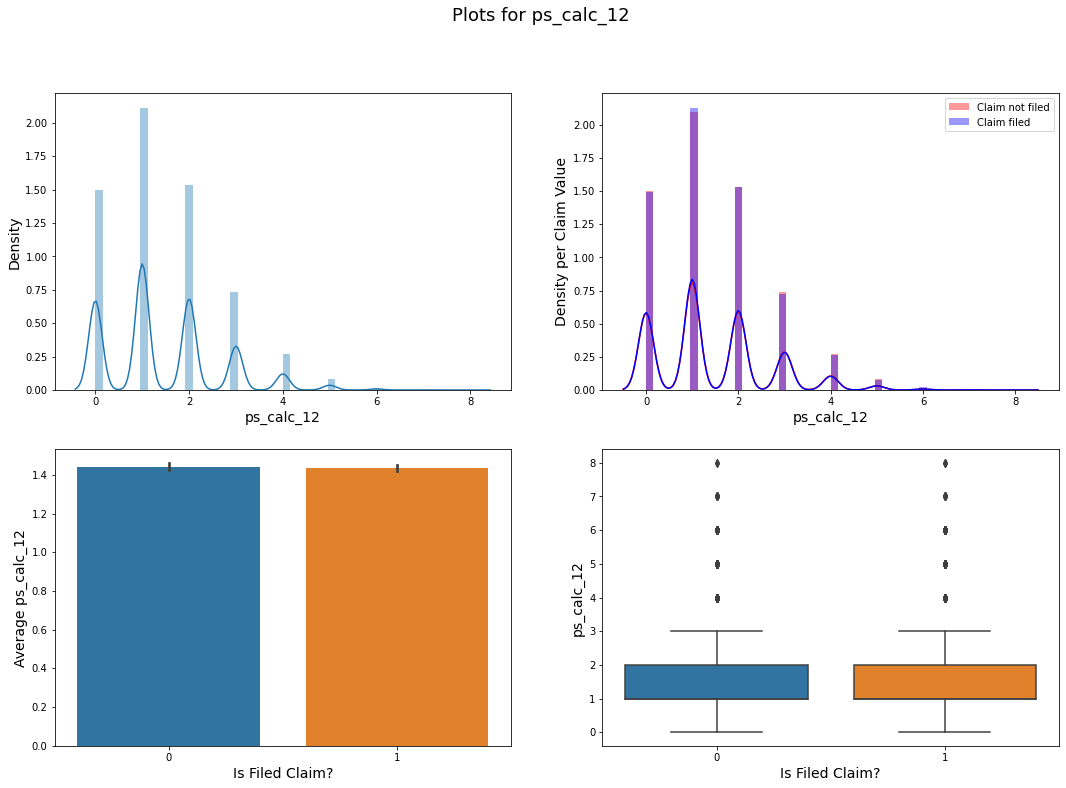

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

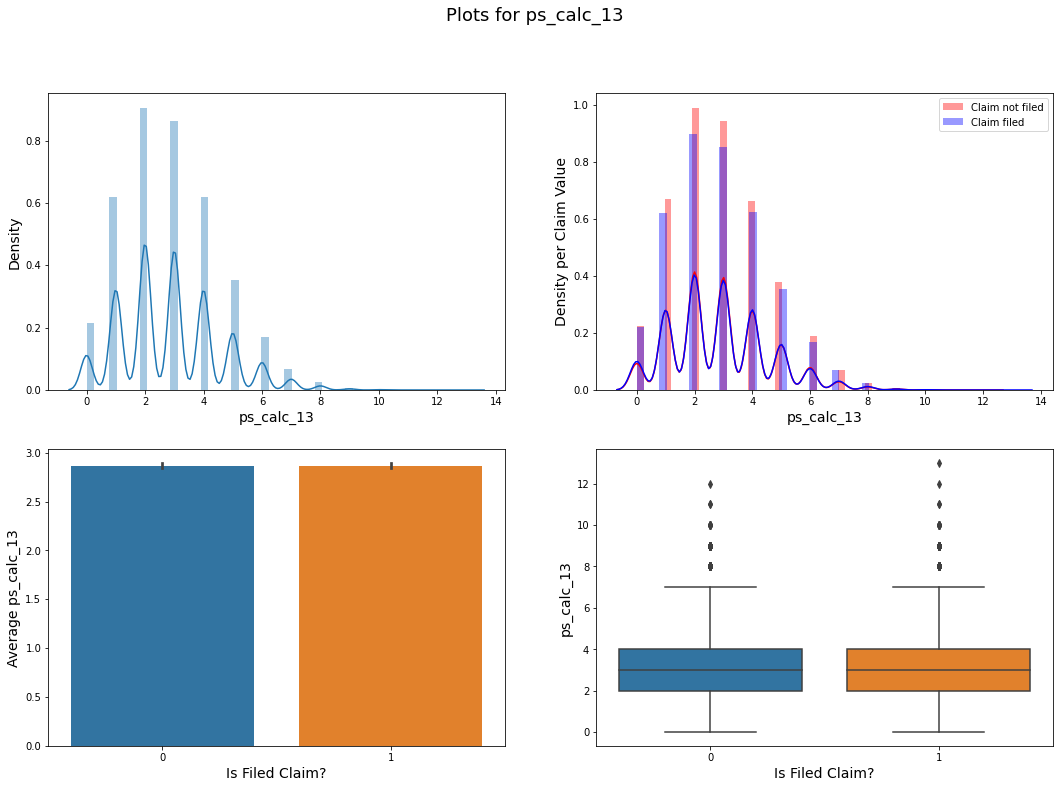

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

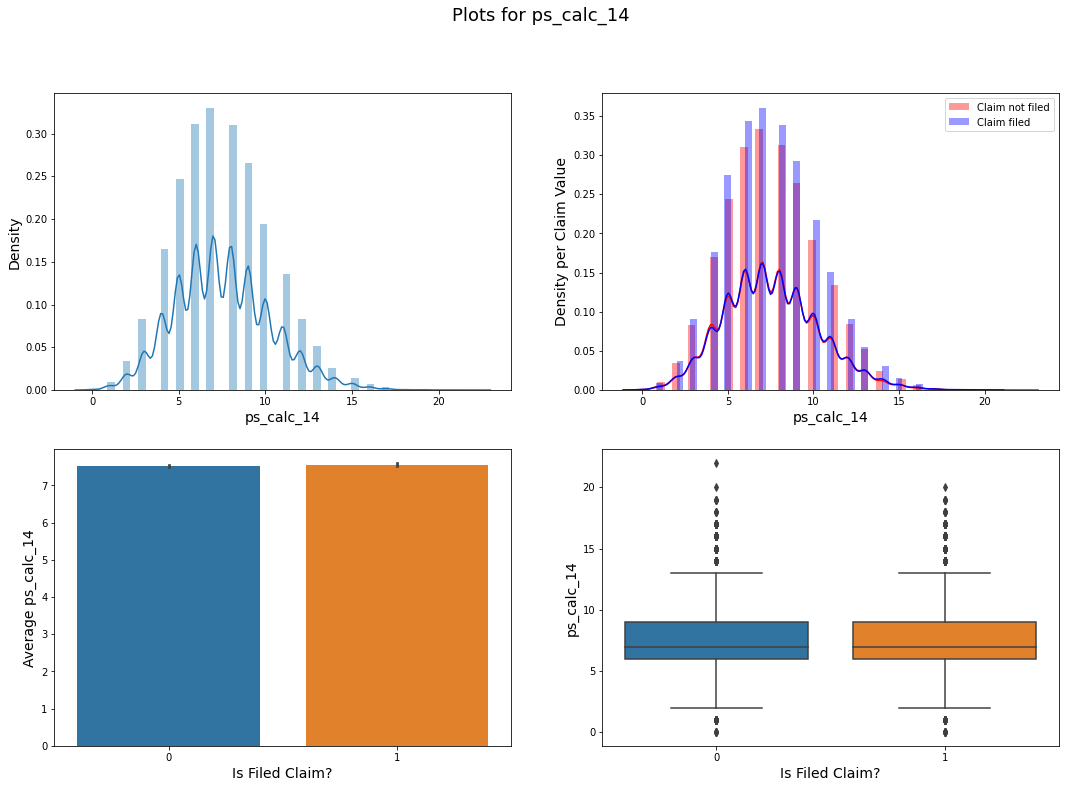

In [ ]:
### Plotting Numeric Features
# Looping through and Plotting Numeric features
for column in numeric_features:    
    # Figure initiation
    fig = plt.figure(figsize=(18,12))
    
    ### Distribution plot
    sns.distplot(df[column], ax=plt.subplot(221));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density', fontsize=14);
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    
    ### Distribution per Claim Value
    # Claim Not Filed hist
    sns.distplot(df.loc[df.target==0, column], color='red', label='Claim not filed', ax=plt.subplot(222));
    # Claim Filed hist
    sns.distplot(df.loc[df.target==1, column], color='blue', label='Claim filed', ax=plt.subplot(222));
    # Adding Legend
    plt.legend(loc='best')
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density per Claim Value', fontsize=14);
    
    ### Average Column value per Claim Value
    sns.barplot(x="target", y=column, data=df, ax=plt.subplot(223));
    # X-axis Label
    plt.xlabel('Is Filed Claim?', fontsize=14);
    # Y-axis Label
    plt.ylabel('Average ' + column, fontsize=14);
    
    ### Boxplot of Column per Claim Value
    sns.boxplot(x="target", y=column, data=df, ax=plt.subplot(224));
    # X-axis Label
    plt.xlabel('Is Filed Claim?', fontsize=14);
    # Y-axis Label
    plt.ylabel(column, fontsize=14);
    # Printing Chart
    plt.show()

HANDLE CATEGORICAL VARIABLES

In [ ]:
# categorical columns
cat_columns = []

for i in df.columns:
    if('cat' in i):
        cat_columns.append(i)

cat_columns

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [ ]:
# Implementing Hot Encoding for Categorical Features
from sklearn.preprocessing import OneHotEncoder

cat_columns = [feature for feature in df if 'cat' in feature]

onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(df[cat_columns]) 

df

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
17527     43944       0          2              1          4              0   
4738      12142       0          2              2          2              1   
685        1779       0          5              1          5              0   
87870    219844       1          1              1          5              0   
2630       6740       0          5              3          5              1   
...         ...     ...        ...            ...        ...            ...   
6500      16606       0          6              1         11              0   
11722     29490       0          1              4          7              0   
478438  1195574       1          1              2          0              1   
895        2332       0          2              2          6              0   
16414     41210       0          0              2          0              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
17527               0           True          False          False  ...   
4738                0          False          False          False  ...   
685                 0          False          False          False  ...   
87870               0           True          False          False  ...   
2630                0          False           True          False  ...   
...               ...            ...            ...            ...  ...   
6500                0          False          False          False  ...   
11722               0           True          False          False  ...   
478438             -1          False           True          False  ...   
895                 0          False          False           True  ...   
16414              -1           True          False          False  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
17527            8           1           0           5           False   
4738             3           1           5           5           False   
685              2           0           3           3           False   
87870            3           2           2           3           False   
2630             9           0           2           7           False   
...            ...         ...         ...         ...             ...   
6500             6           1           2          12           False   
11722            8           1           2           7           False   
478438           8           0           4           6           False   
895              6           2           0           7           False   
16414            7           1           1           7            True   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
17527             True            True           False            True   
4738              True            True           False           False   
685               True            True           False           False   
87870            False           False           False           False   
2630             False            True           False           False   
...                ...             ...             ...             ...   
6500              True            True           False           False   
11722            False           False            True           False   
478438           False            True           False           False   
895              False            True           False            True   
16414             True           False           False            True   

        ps_calc_20_bin  
17527            False  
4738             False  
685              False  
87870             True  
2630             False  
...                ...  
6500             False  
11722            False  
478438           False  
895               True  
16414            False  

[42436 rows x 59 columns]

### ***Explodatory_Data_Analysis***
Step1-> Data_Cleaning & Preparation

In [ ]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(df).head(59)

Your selected dataframe has 59 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
missing_values_table(df).head(50)

Your selected dataframe has 59 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [ ]:
df.dropna(inplace=True)
missing_values_table(df)

Your selected dataframe has 59 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [ ]:
df.shape

(42436, 59)

In [ ]:
for i in df.select_dtypes(include=['object']).columns:
    df.drop(labels=i, axis=1, inplace=True)

Text(0.5, 1.0, 'claim was filed for that policy holder')

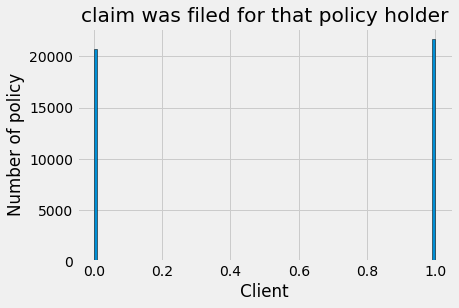

In [ ]:
#-> Single Variable Plots

figsize=(8,8)

# Histogram of the Target_Column
plt.style.use('fivethirtyeight')
plt.hist(df['target'], bins = 100, edgecolor = 'k')
plt.xlabel('Client') 
plt.ylabel('Number of policy');
plt.title('claim was filed for that policy holder')

In [ ]:
#-> Display the Exact Frequency into % stuff
df['target'].value_counts(normalize=True)

1    0.511217
0    0.488783
Name: target, dtype: float64

->Numeric Features Exploration

In [ ]:
### Plotting Numeric Features
# Looping through and Plotting Numeric features
for column in numeric_features:    
    # Figure initiation
    fig = plt.figure(figsize=(18,12))
    
    ### Distribution plot
    sns.distplot(df[column], ax=plt.subplot(221));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density', fontsize=14);
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    
    ### Distribution per Claim Value
    # Claim Not Filed hist
    sns.distplot(df.loc[df.target==0, column], color='red', label='Claim not filed', ax=plt.subplot(222));
    # Claim Filed hist
    sns.distplot(df.loc[df.target==1, column], color='blue', label='Claim filed', ax=plt.subplot(222));
    # Adding Legend
    plt.legend(loc='best')
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density per Claim Value', fontsize=14);
    
    ### Average Column value per Claim Value
    sns.barplot(x="target", y=column, data=df, ax=plt.subplot(223));
    # X-axis Label
    plt.xlabel('Is Filed Claim?', fontsize=14);
    # Y-axis Label
    plt.ylabel('Average ' + column, fontsize=14);
    
    ### Boxplot of Column per Claim Value
    sns.boxplot(x="target", y=column, data=df, ax=plt.subplot(224));
    # X-axis Label
    plt.xlabel('Is Filed Claim?', fontsize=14);
    # Y-axis Label
    plt.ylabel(column, fontsize=14);
    # Printing Chart
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

->Categorical Features Exploration

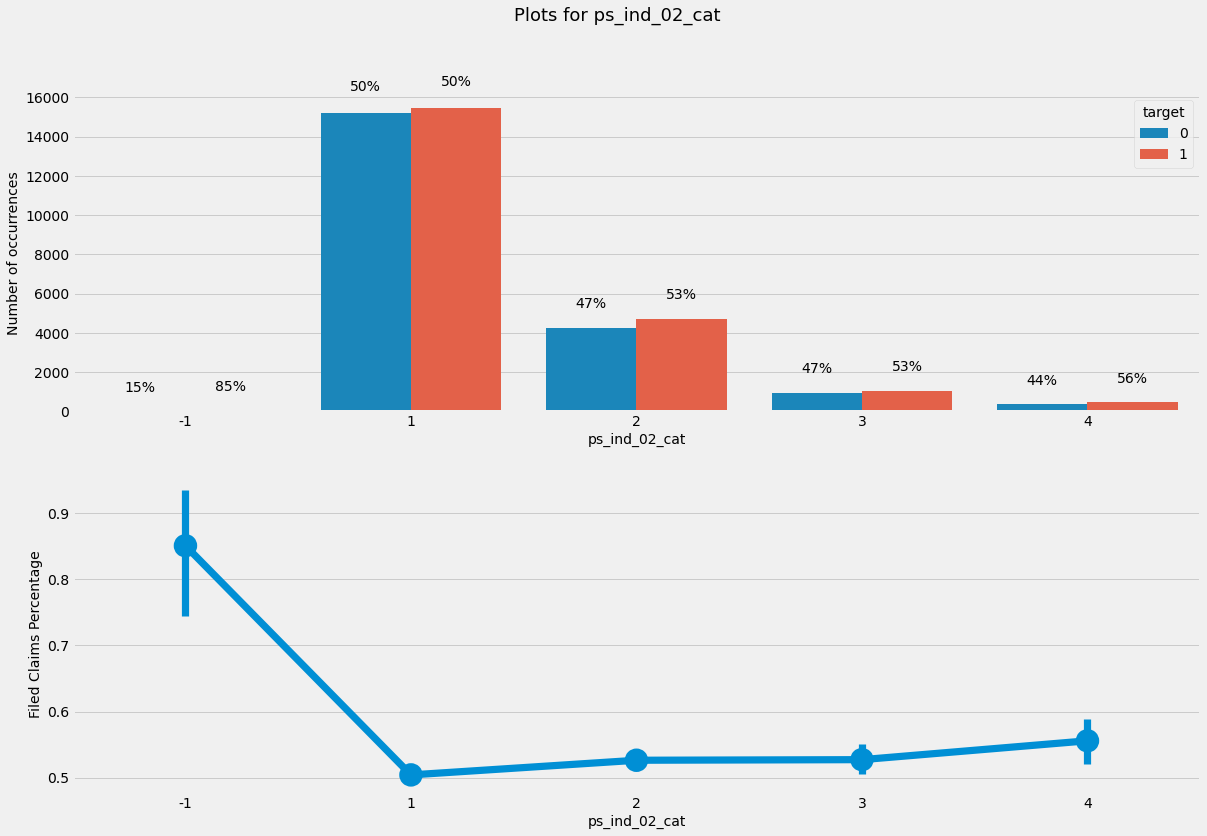

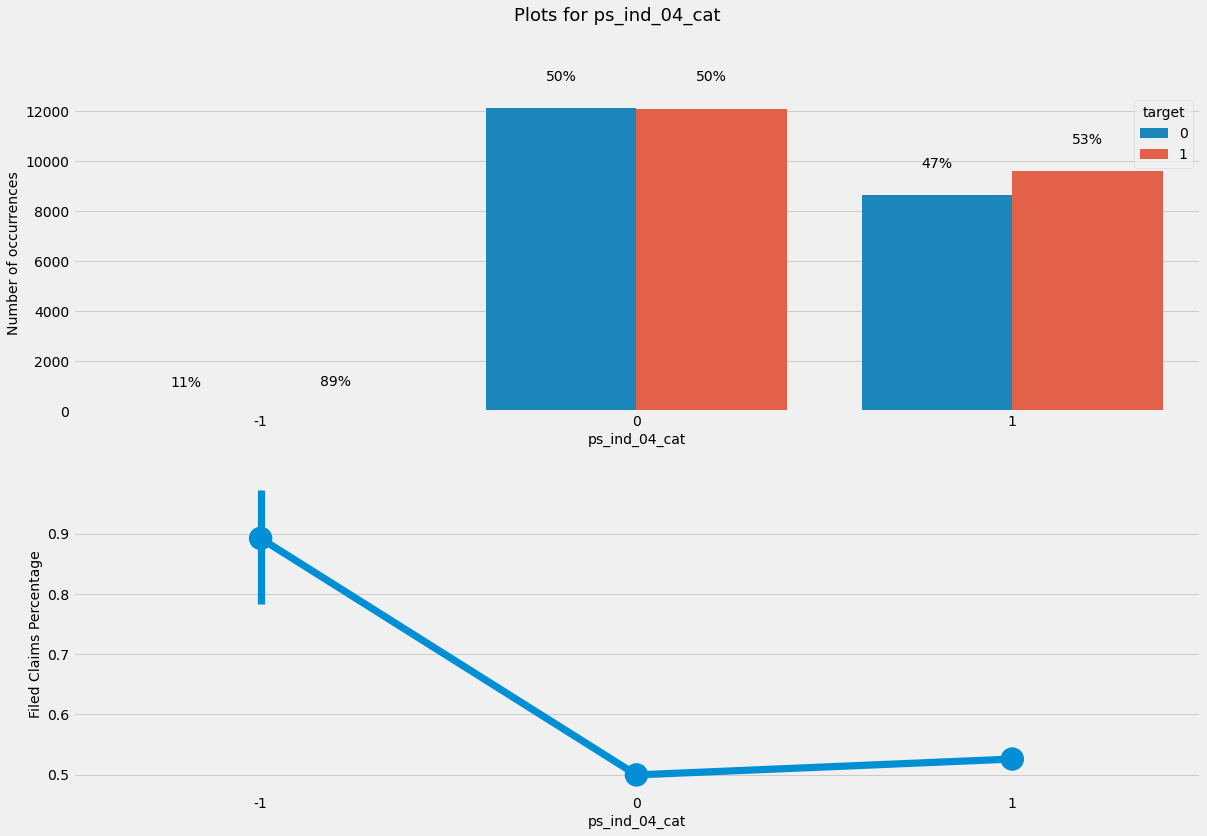

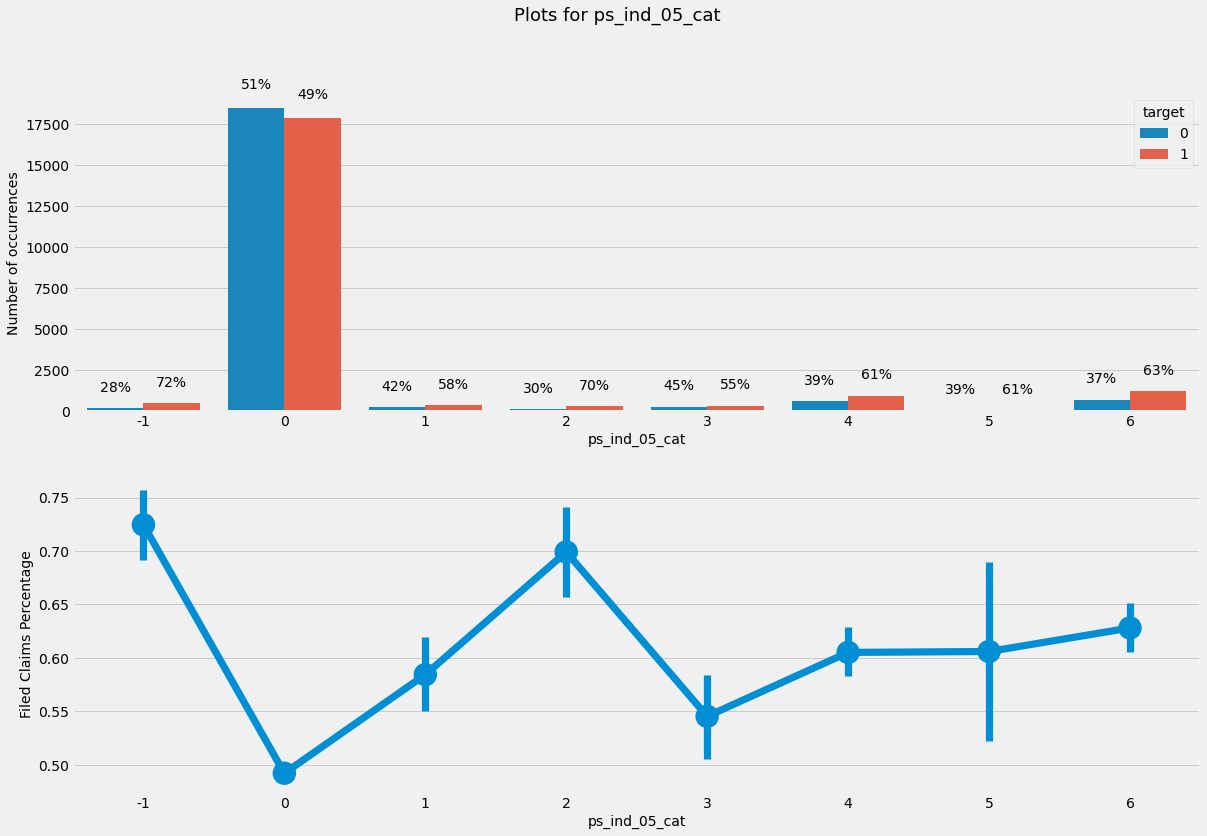

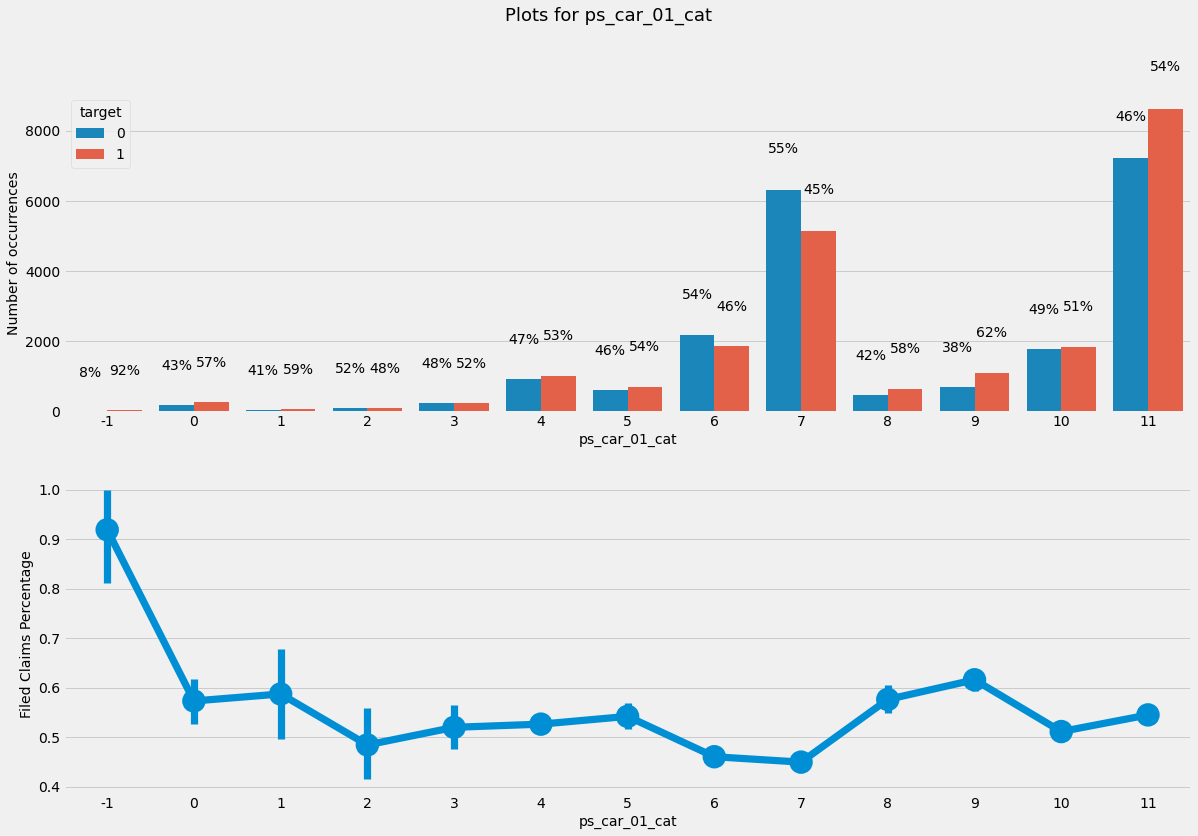

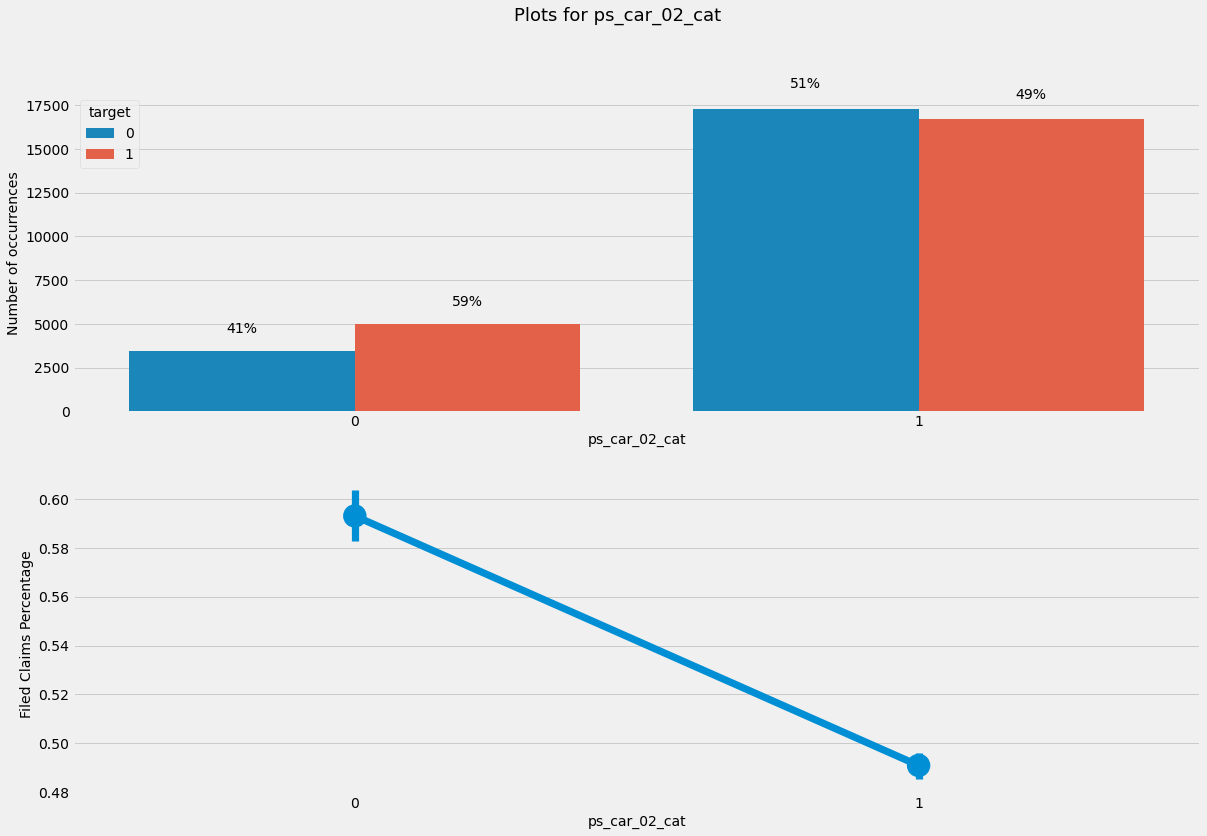

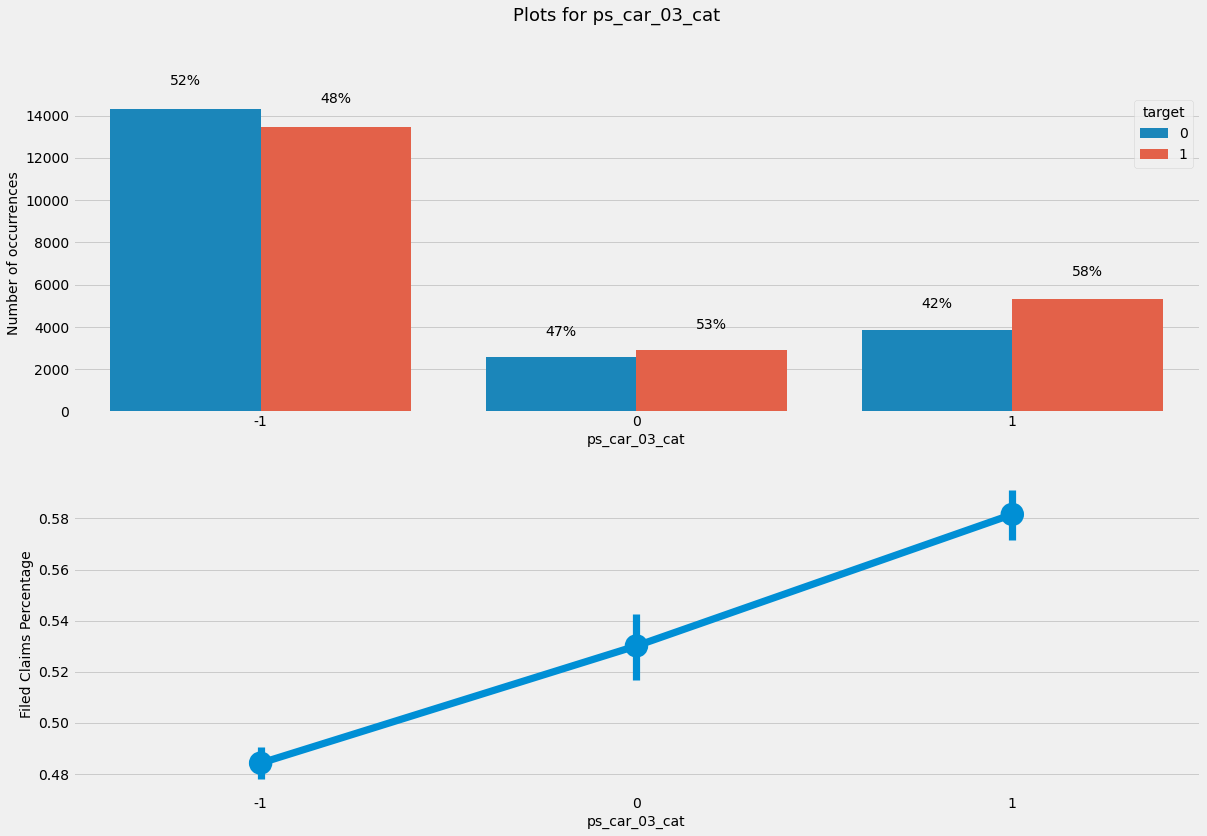

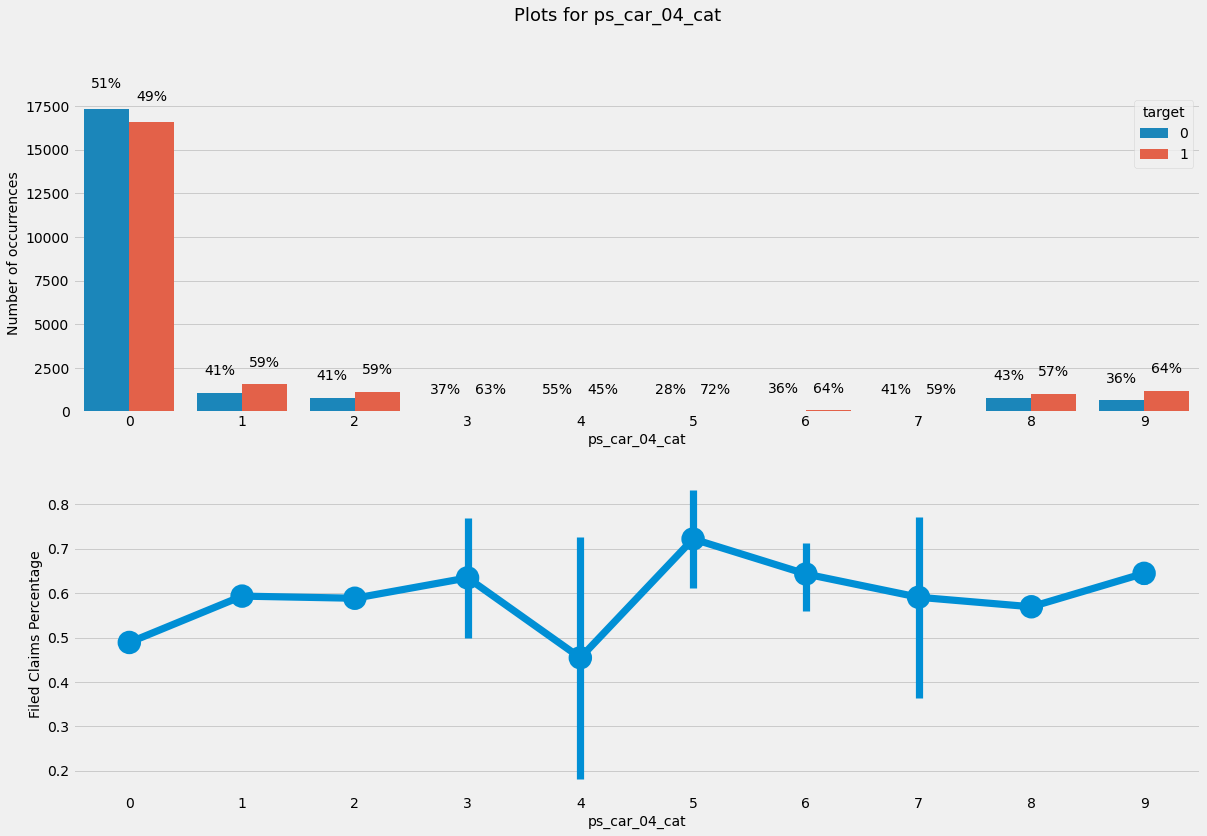

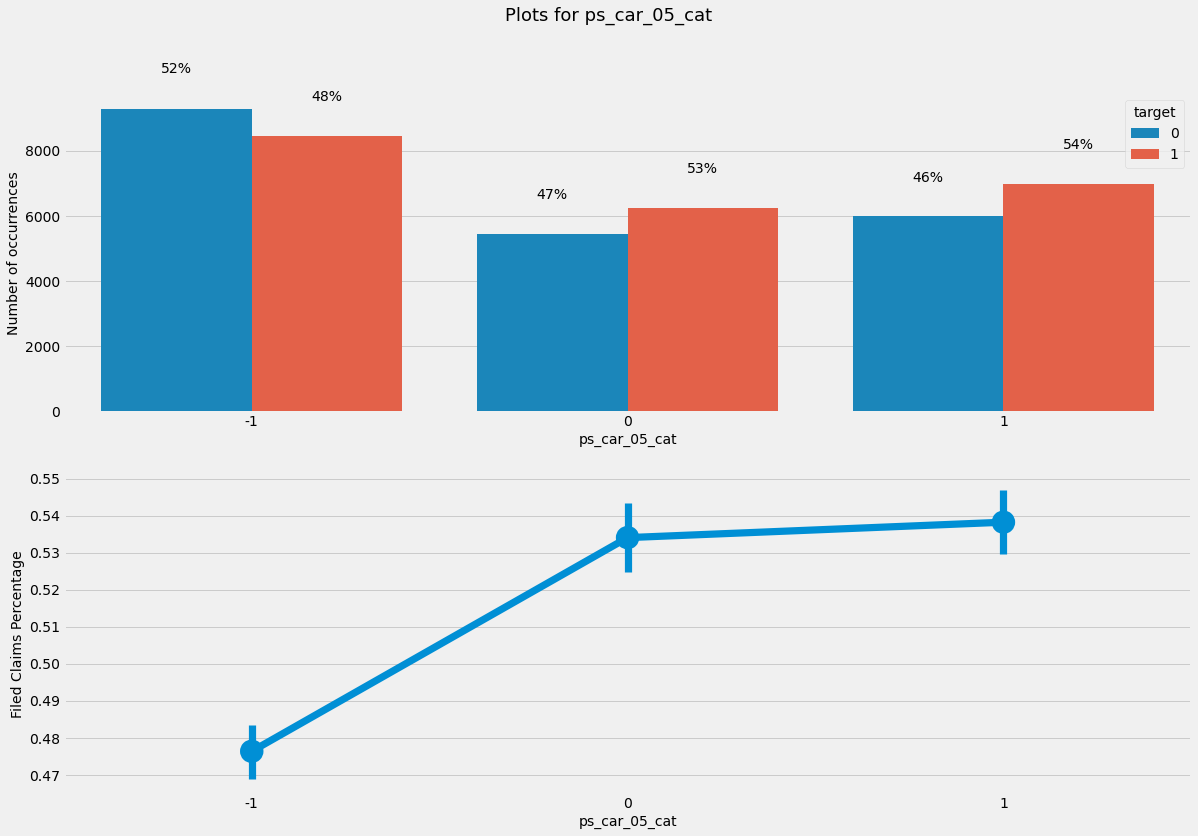

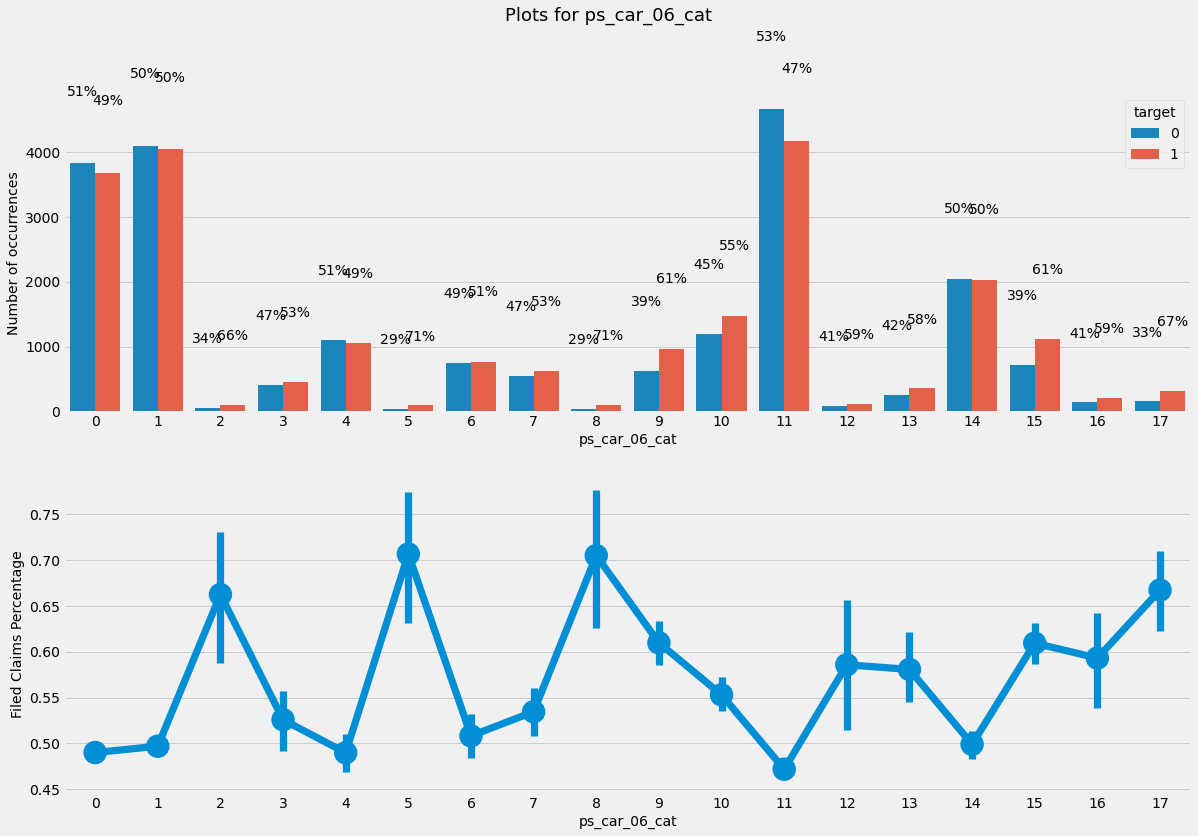

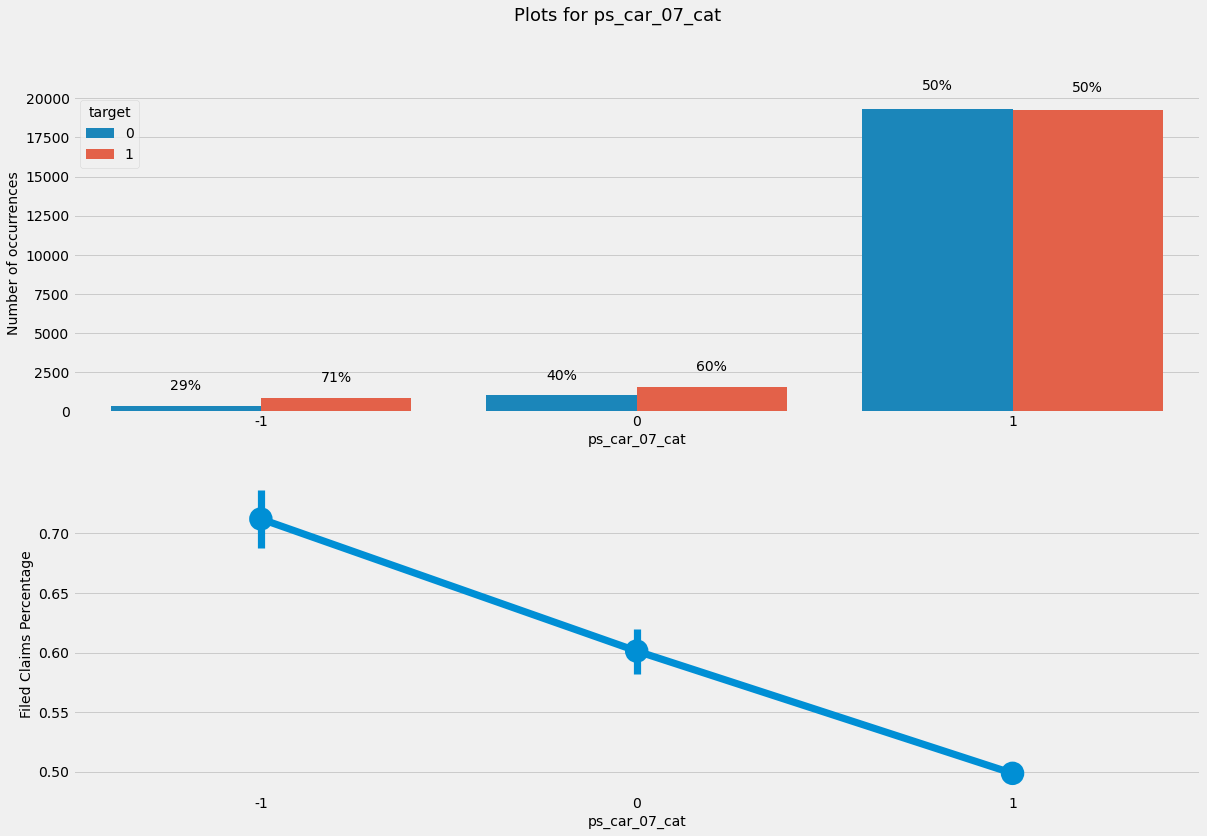

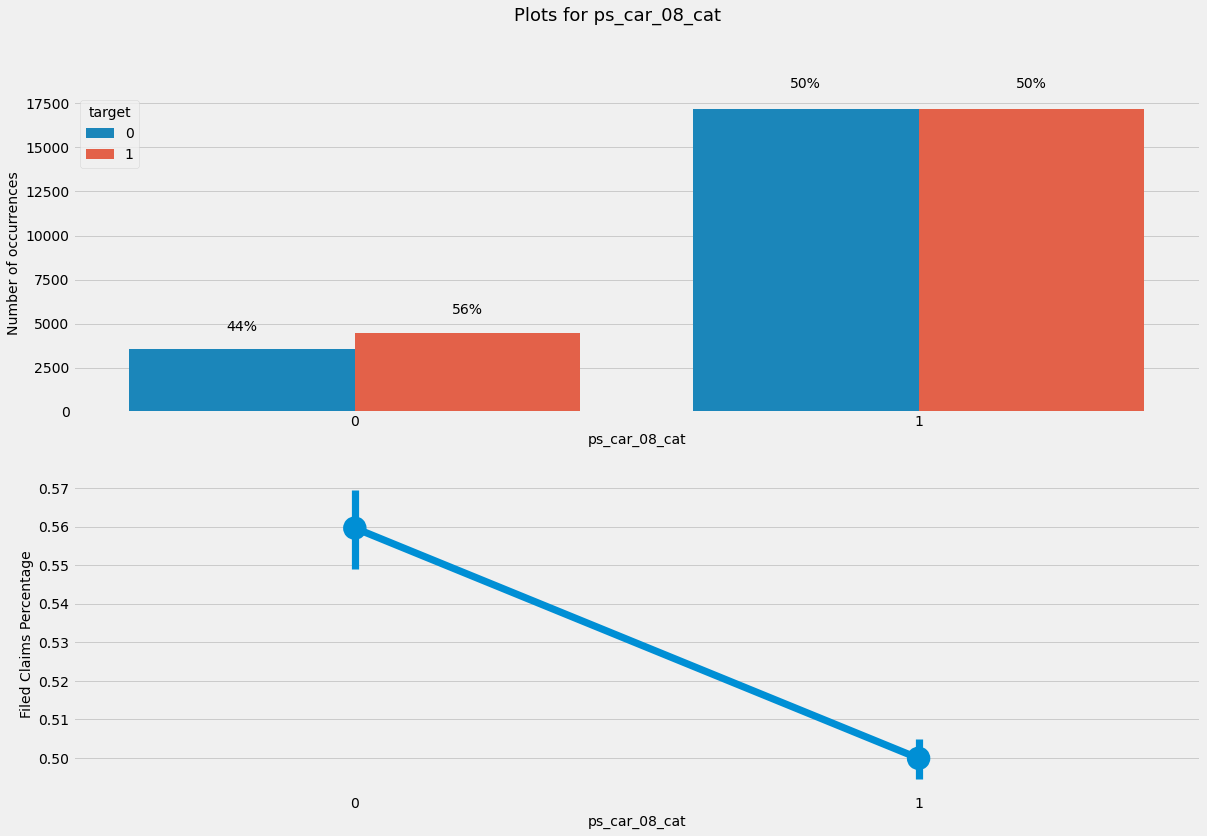

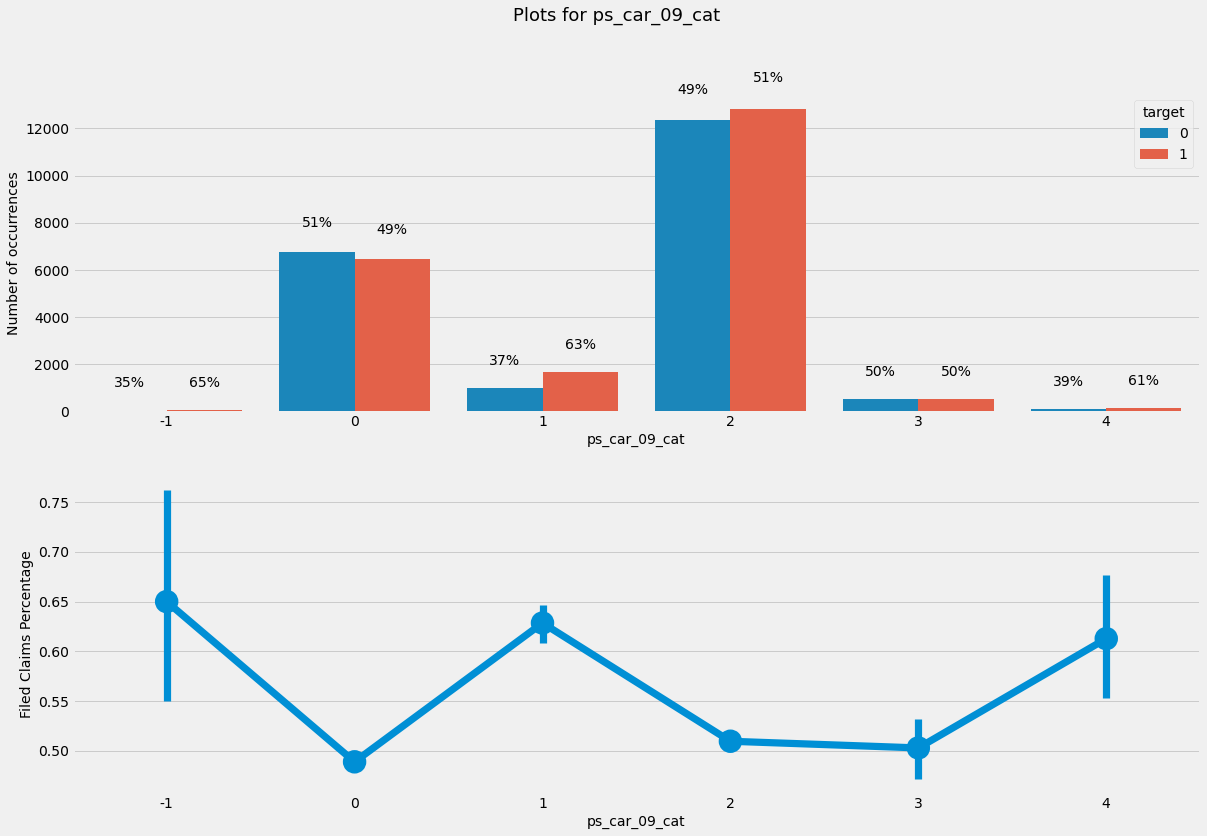

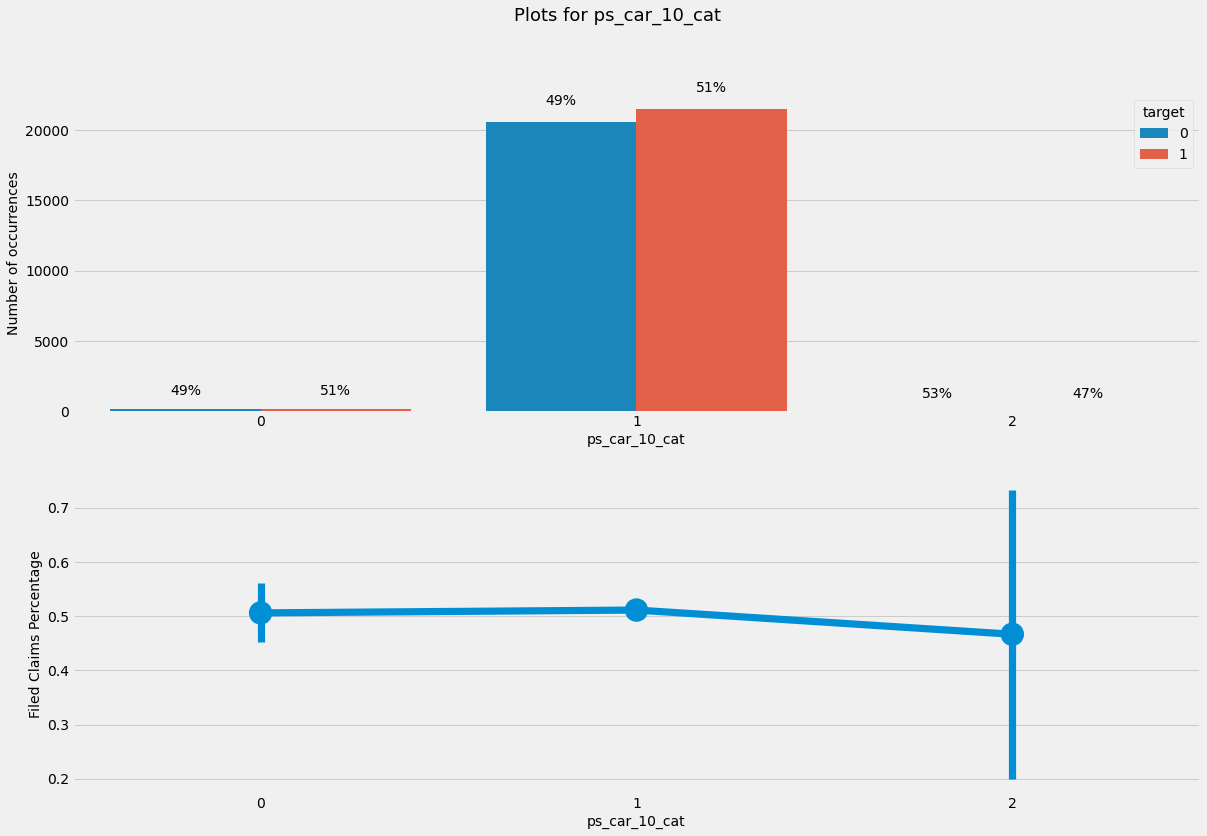

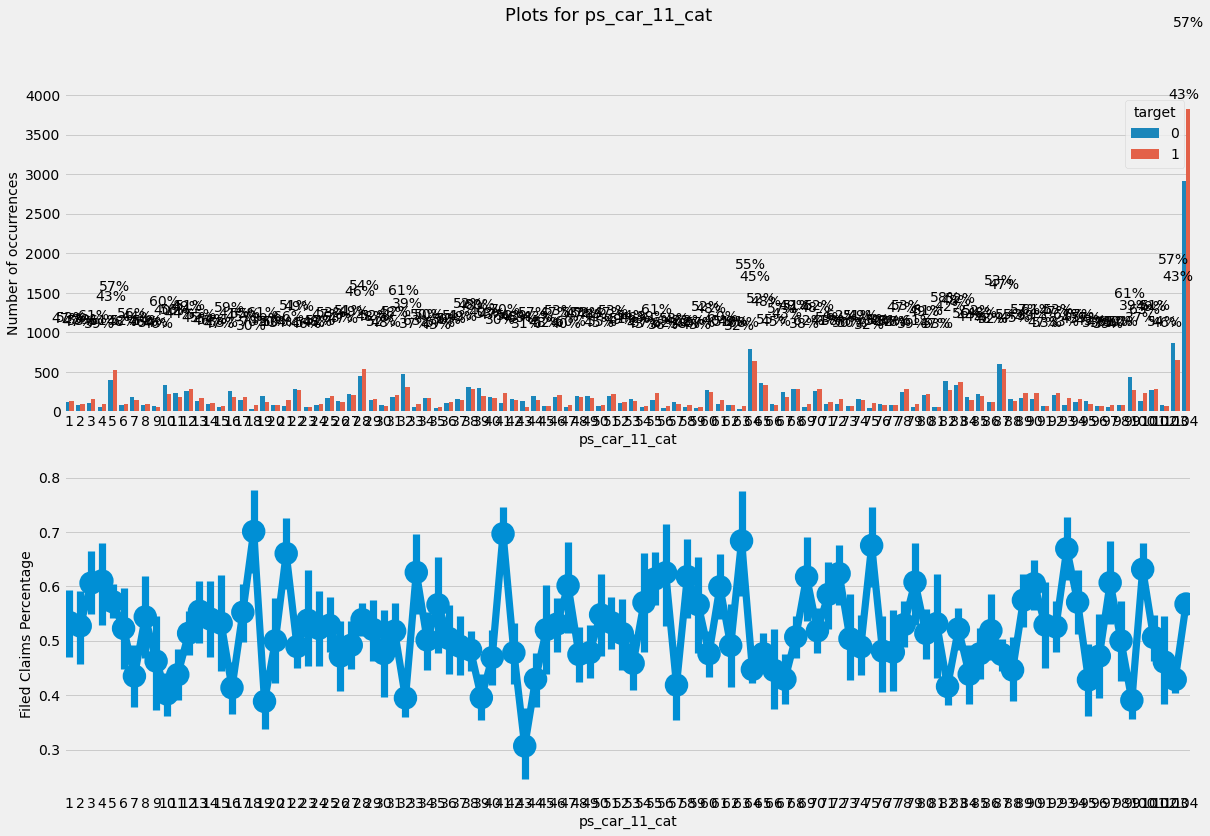

In [ ]:
### Plotting Categorical Features
# Looping through and Plotting Categorical features
for column in categorical_features:
    # Figure initiation
    fig = plt.figure(figsize=(18,12))
    
    ### Number of occurrences per categoty - target pair
    ax = sns.countplot(x=column, hue="target", data=df, ax = plt.subplot(211));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Number of occurrences', fontsize=14)
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    
    ### Adding percents over bars
    # Getting heights of our bars
    height = [p.get_height() for p in ax.patches]
    # Counting number of bar groups 
    ncol = int(len(height)/2)
    # Counting total height of groups
    total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
    # Looping through bars
    for i, p in enumerate(ax.patches):    
        # Adding percentages
        ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 1000,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=14) 

    
    ### Filed Claims percentage for every value of feature
    sns.pointplot(x=column, y='target', data=df, ax = plt.subplot(212));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Filed Claims Percentage', fontsize=14);
    # Printing Chart
    plt.show()

->Binary Features Exploration

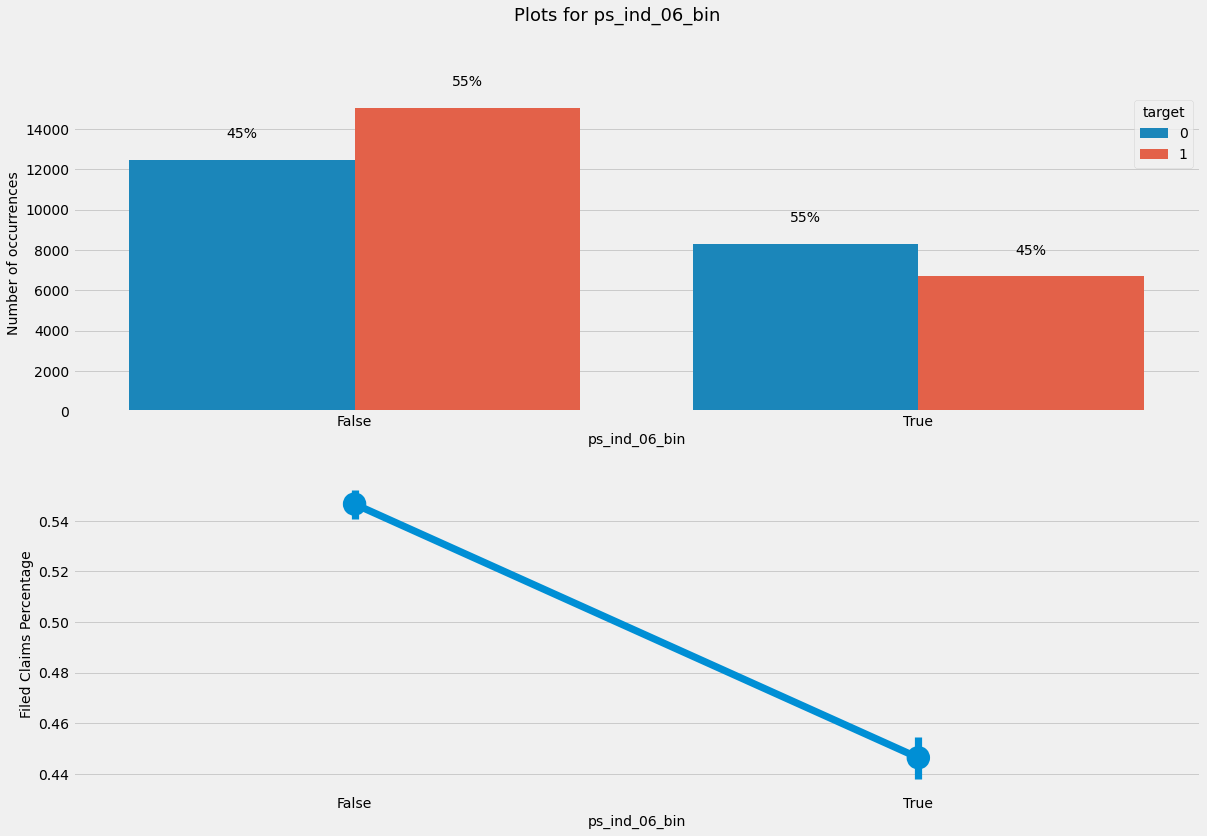

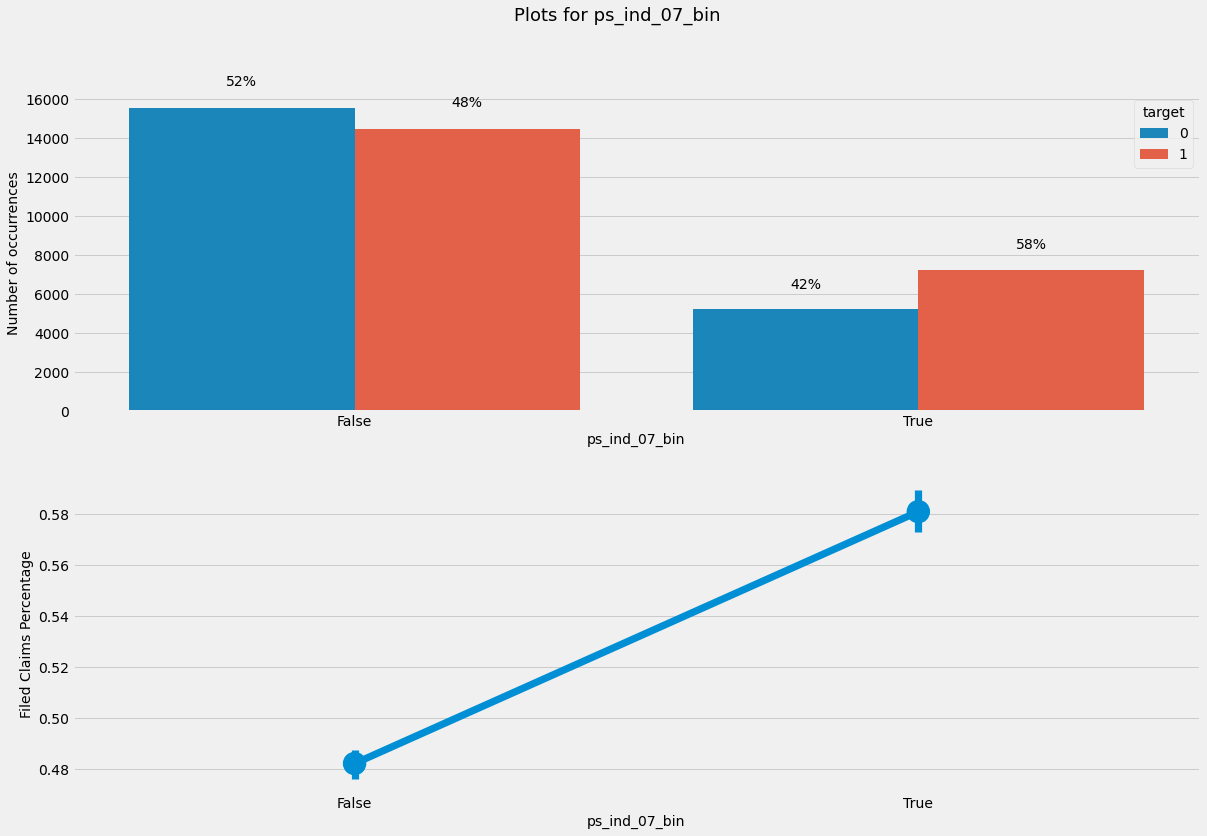

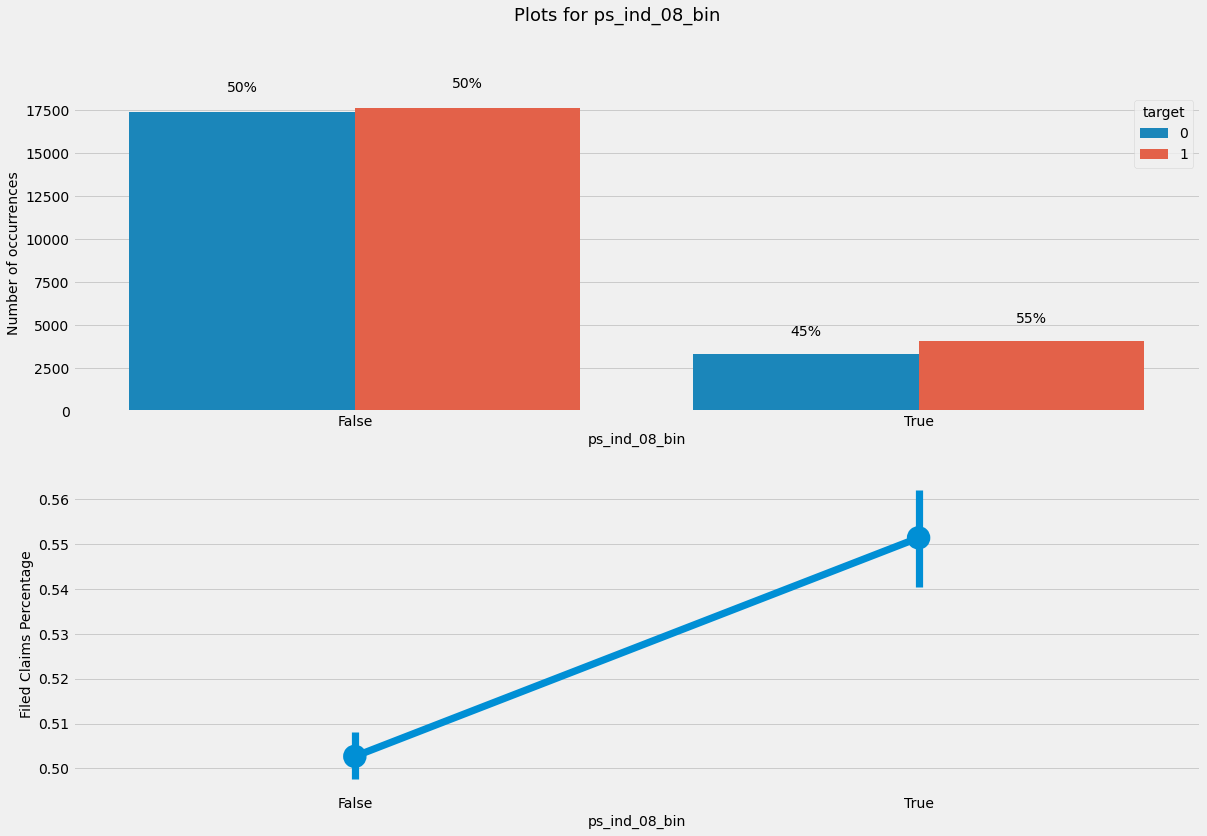

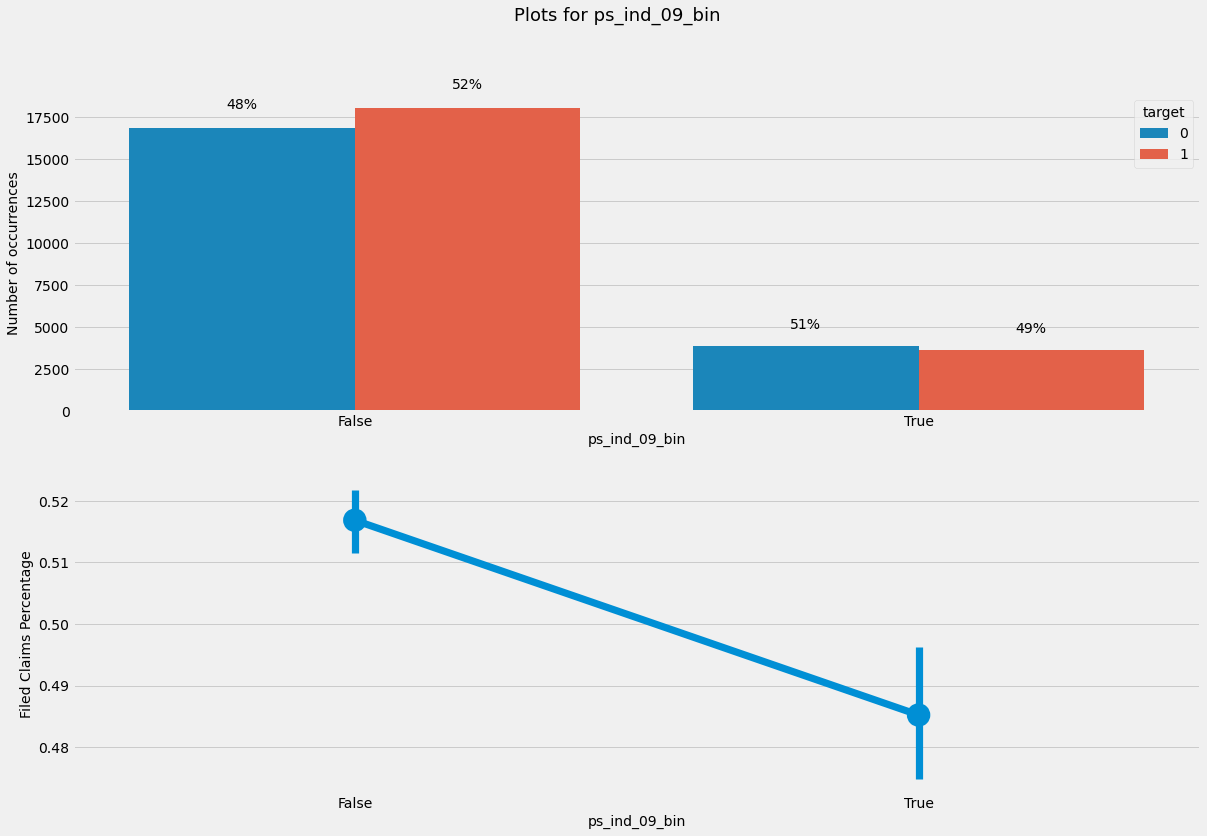

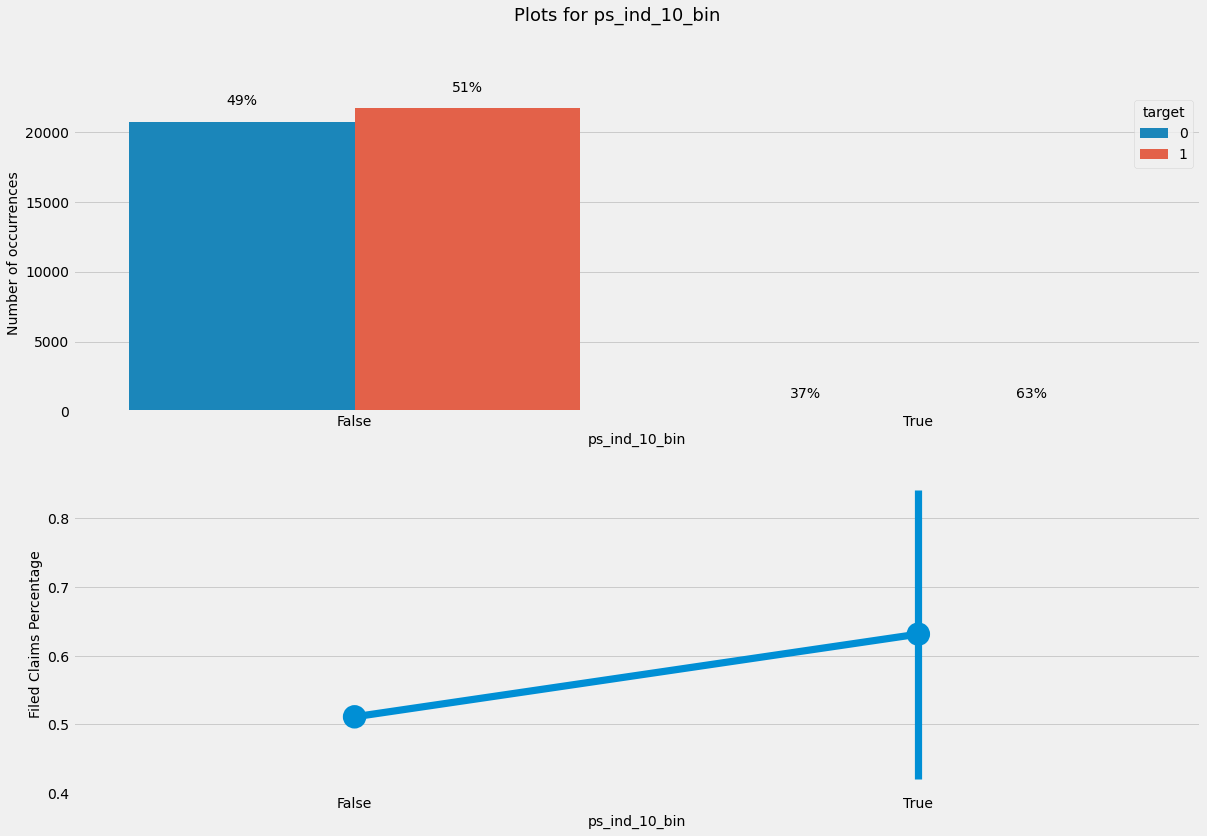

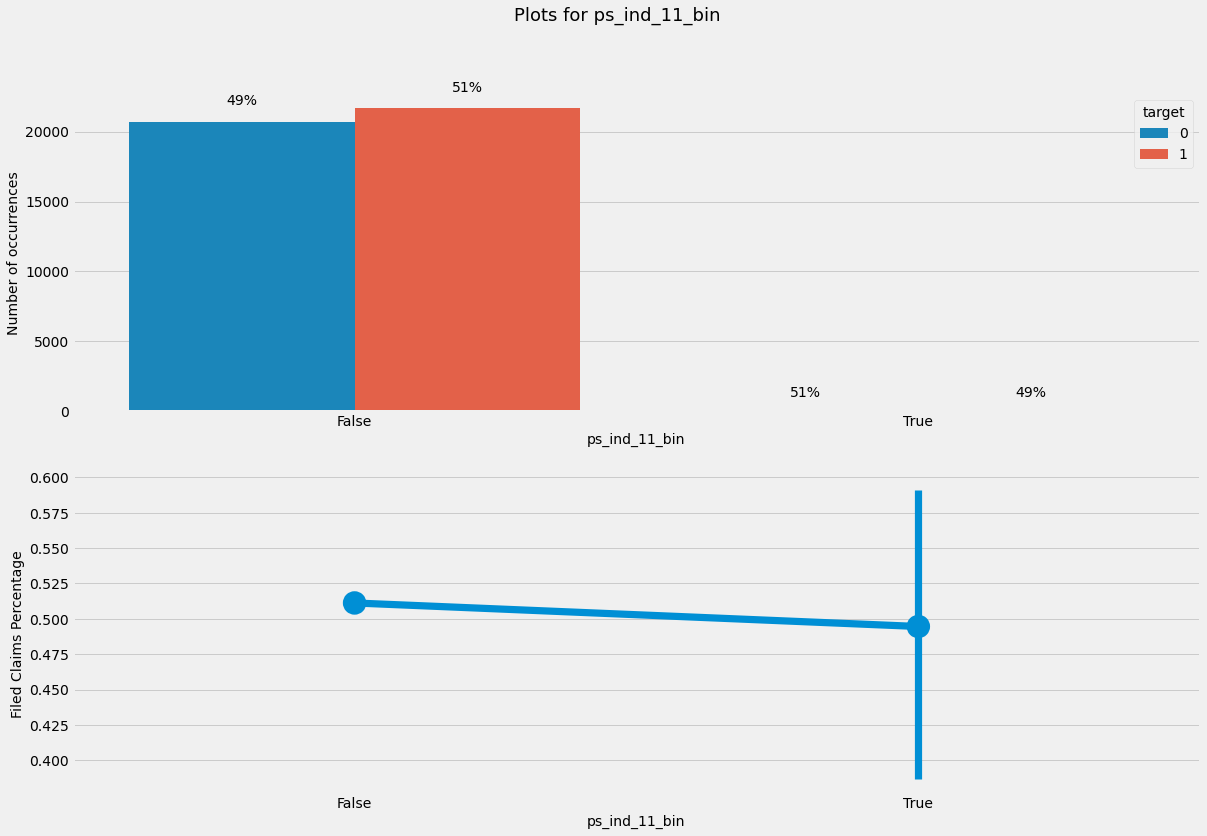

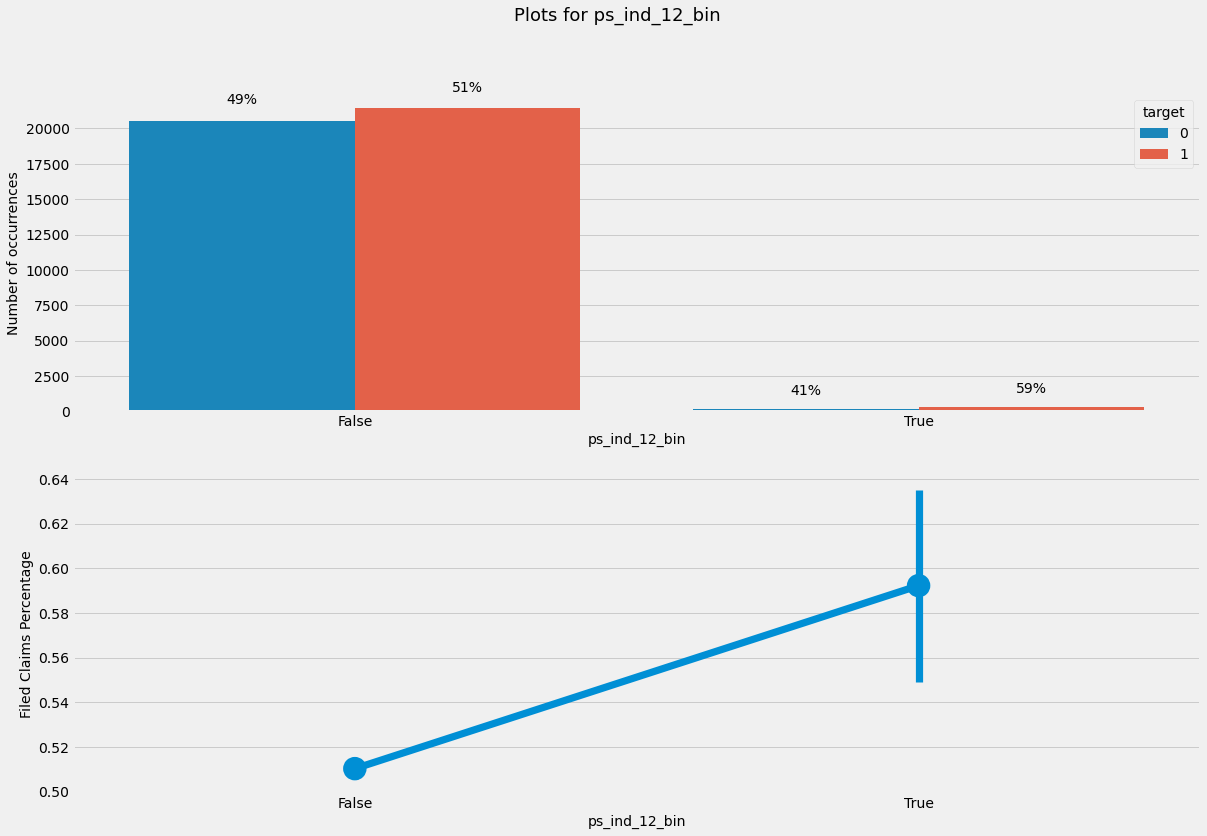

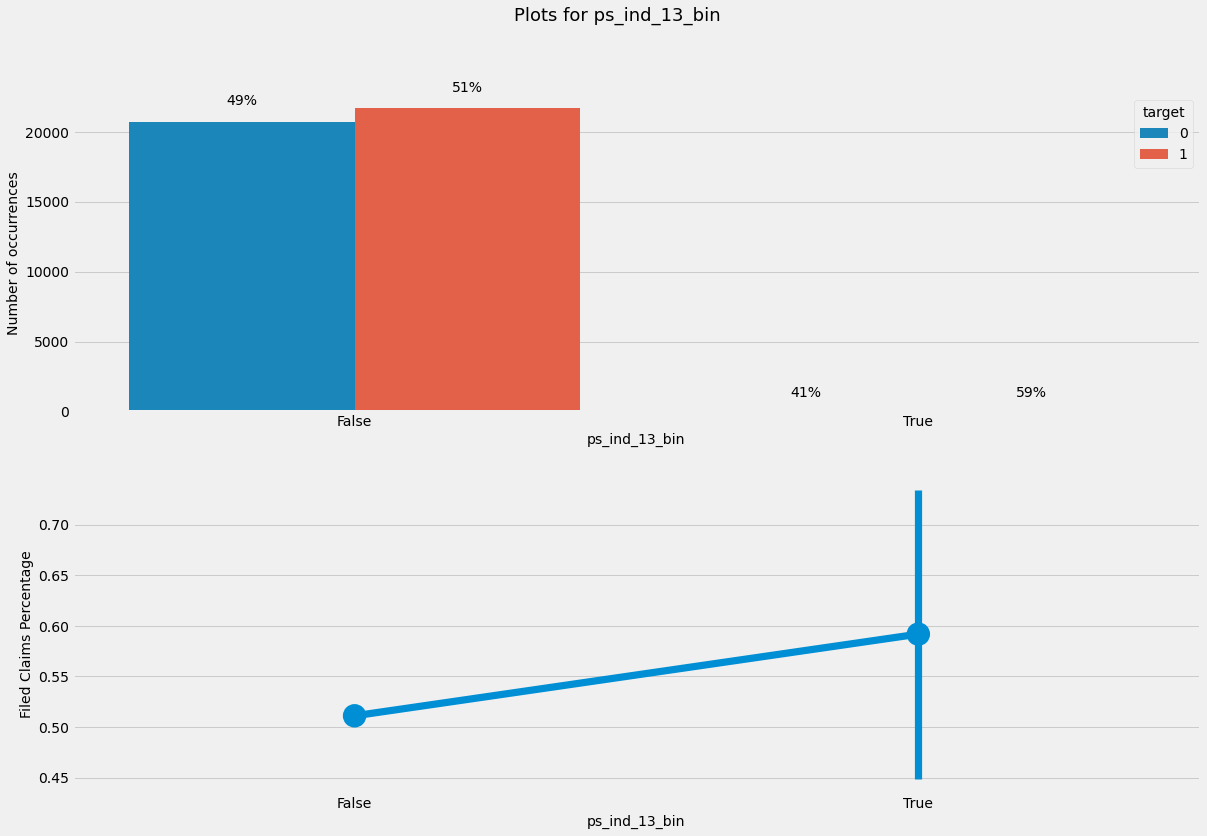

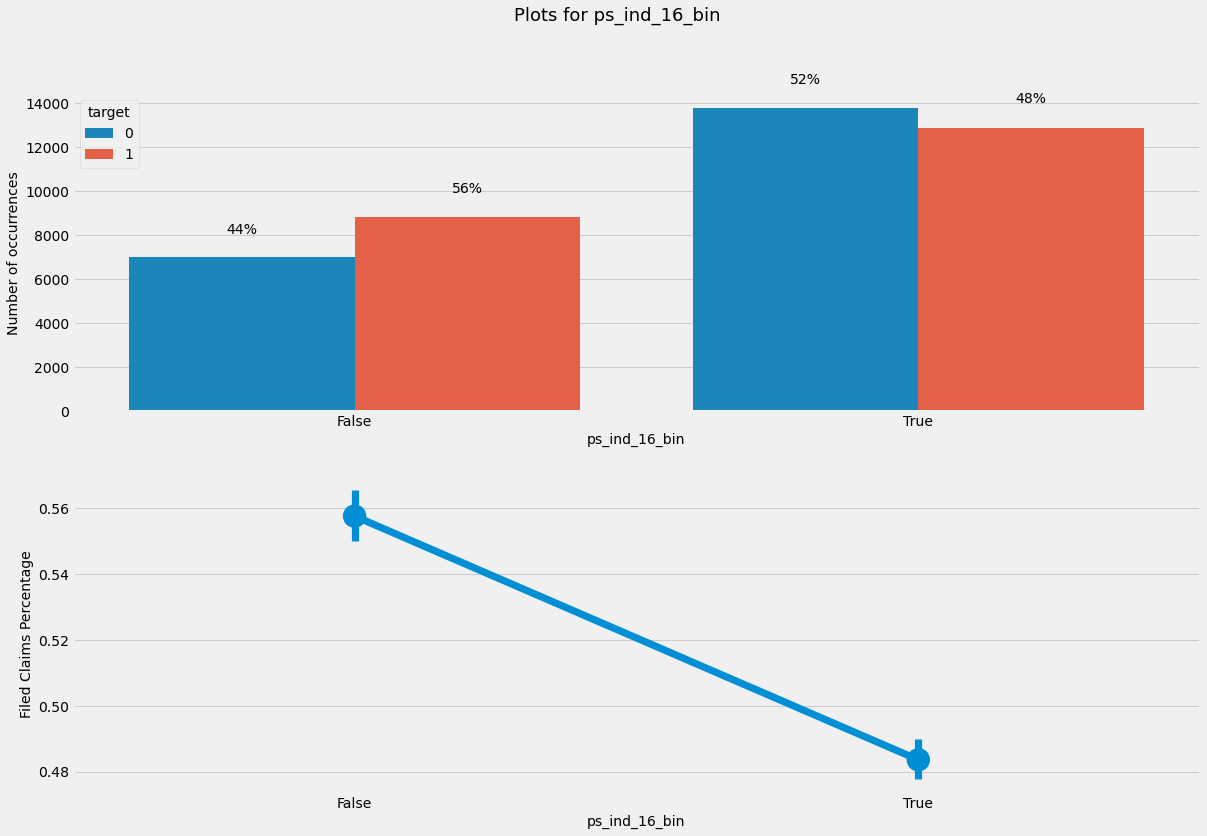

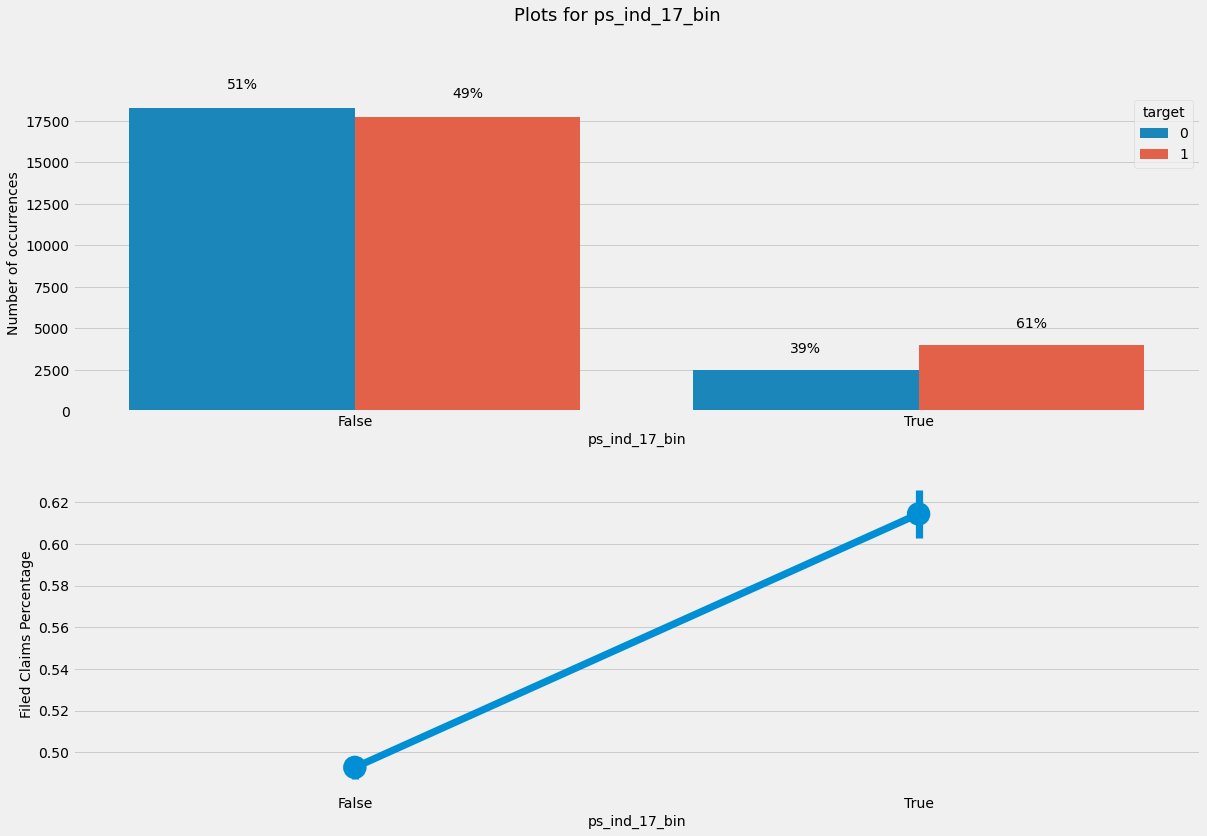

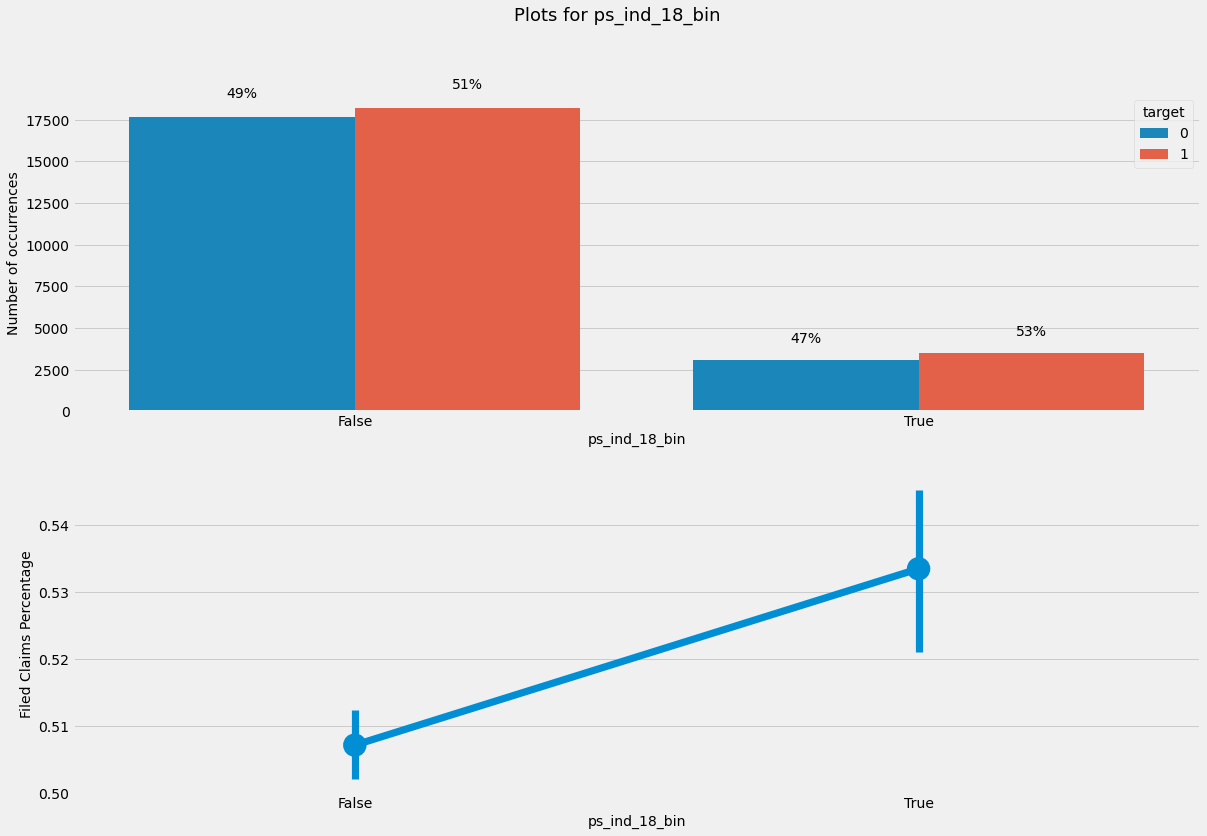

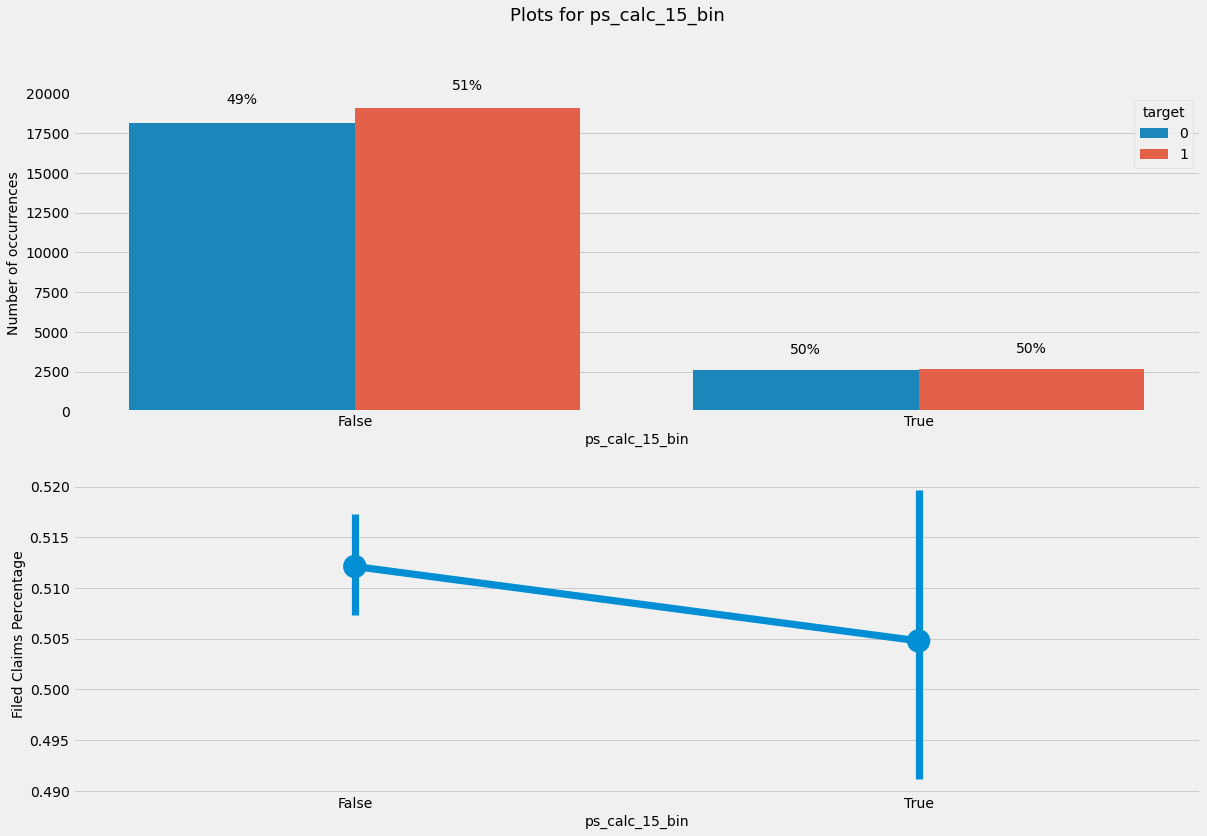

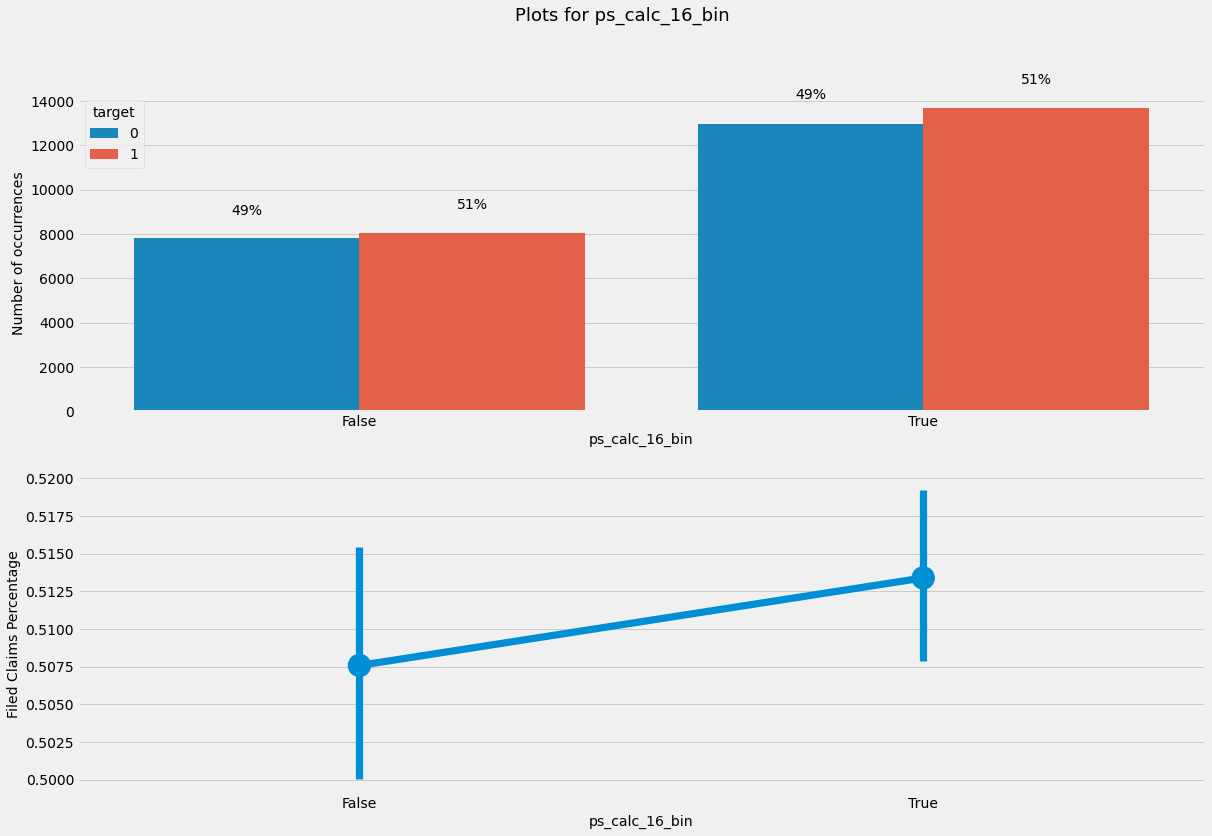

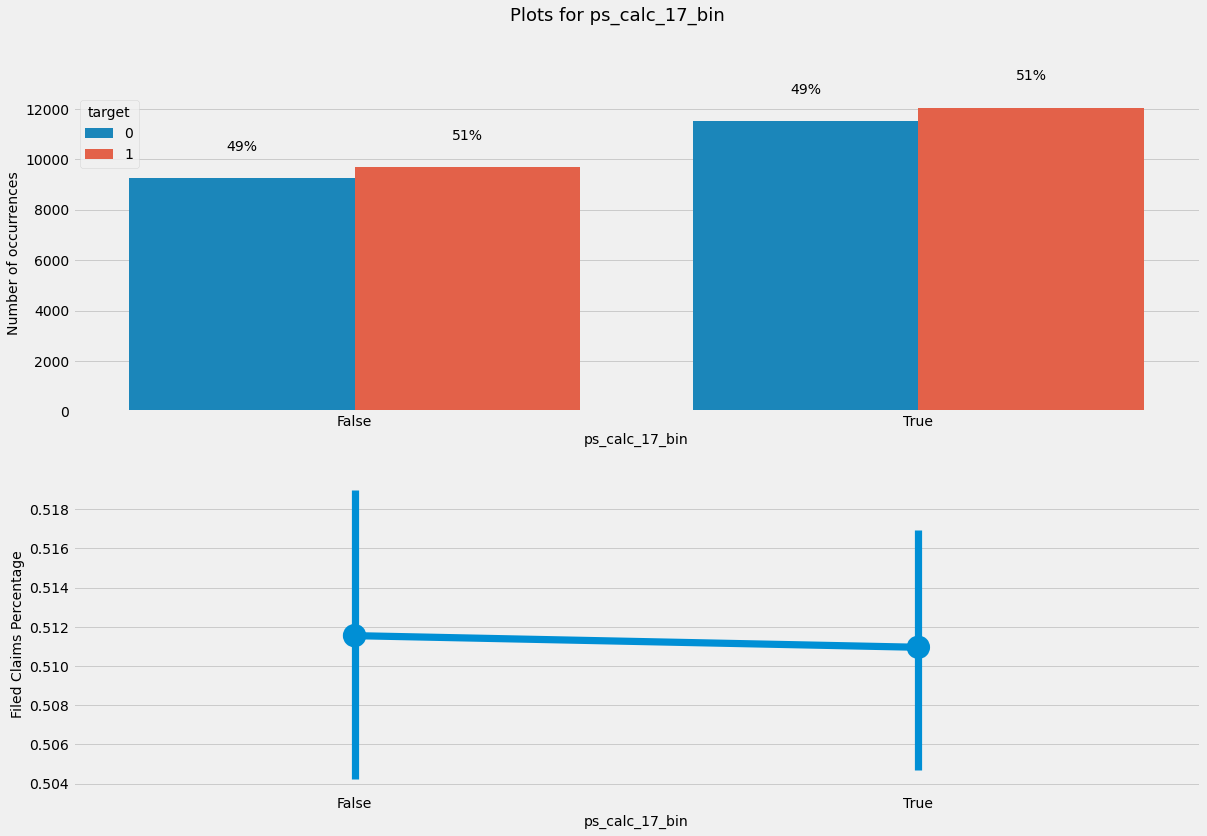

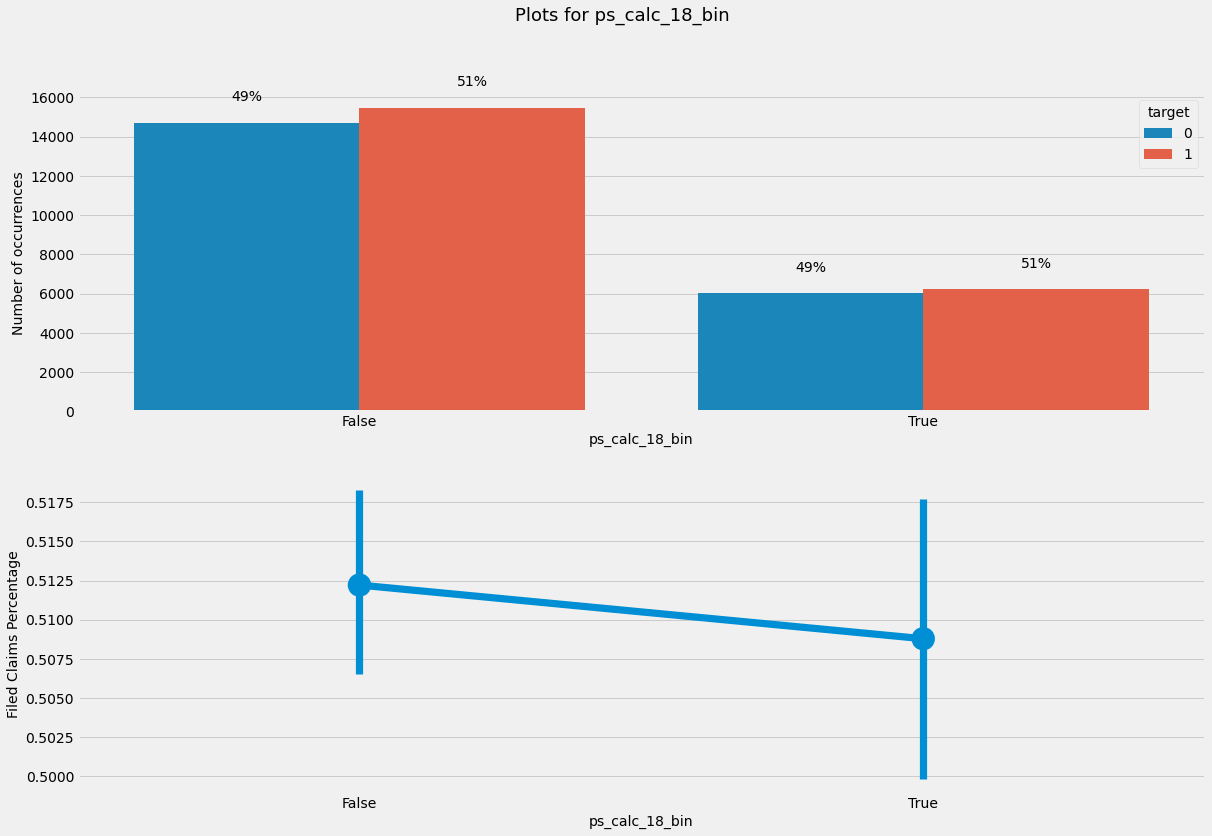

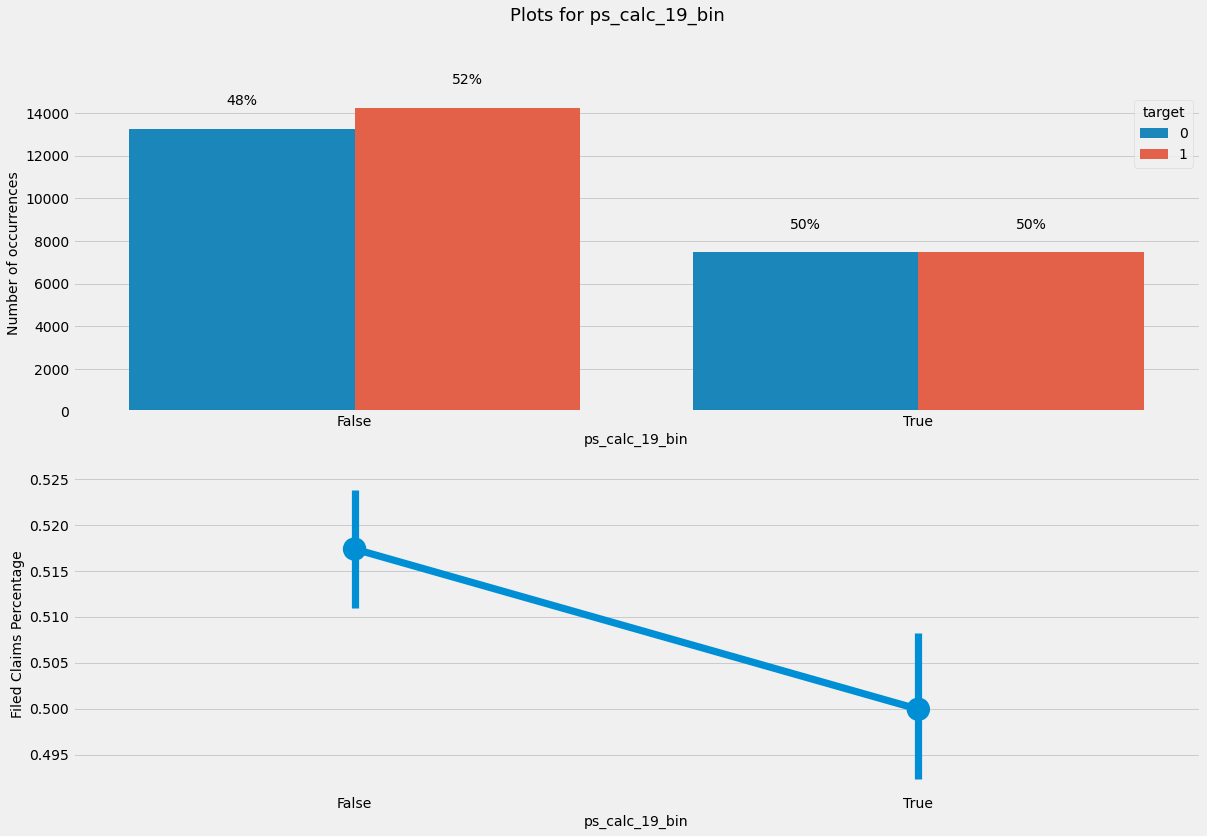

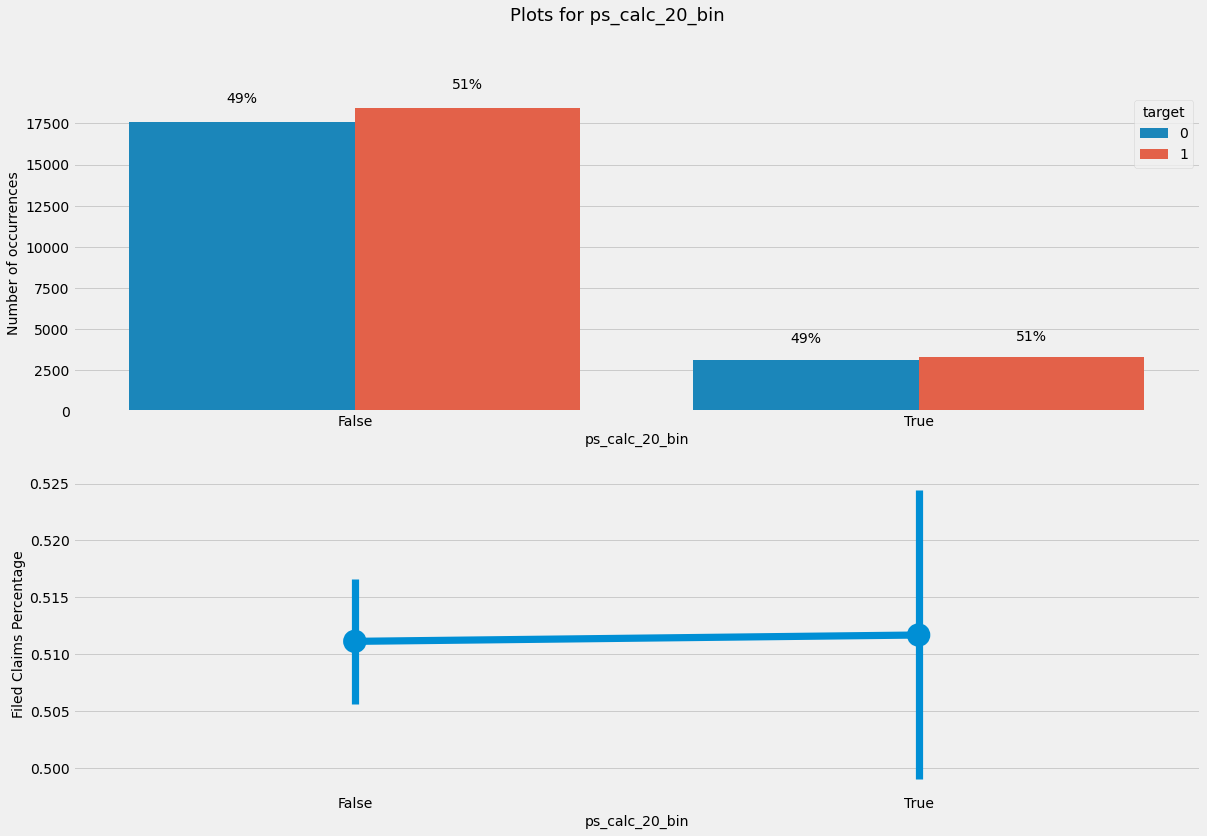

In [ ]:
### Plotting Binary Features
# Looping through and Plotting Binary features
for column in binary_features:
    ### Figure initiation 
    fig = plt.figure(figsize=(18,12))
    
    ### Number of occurrences per binary value - target pair
    ax = sns.countplot(x=column, hue="target", data=df, ax = plt.subplot(211));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Number of occurrences', fontsize=14)
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    
    ### Adding percents over bars
    # Getting heights of our bars
    height = [p.get_height() for p in ax.patches]
    # Counting number of bar groups 
    ncol = int(len(height)/2)
    # Counting total height of groups
    total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
    # Looping through bars
    for i, p in enumerate(ax.patches):    
        # Adding percentages
        ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 1000,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=14) 
        

    ### Filed Claims percentage for every value of feature
    sns.pointplot(x=column, y='target', data=df, ax = plt.subplot(212));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Filed Claims Percentage', fontsize=14);
    # Printing Chart
    plt.show()

->Whole Data Exploration

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 16.5 MB/s 
     |████████████████████████████████| 943 kB 50.4 MB/s 
     |████████████████████████████████| 749 kB 51.8 MB/s 
     |████████████████████████████████| 435 kB 71.0 MB/s 
     |████████████████████████████████| 95 kB 5.3 MB/s 
     |████████████████████████████████| 133 kB 75.5 MB/s 
     |████████████████████████████████| 50 kB 8.3 MB/s 
     |████████████████████████████████| 1.0 MB 3.9 MB/s 
     |████████████████████████████████| 965 kB 23.9 MB/s 
     |████████████████████████████████| 78 kB 9.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1 MB 48.6 MB/s 
     |████████████████████████████████| 271 kB 69.2 MB/s 
     |████████████████████████████████| 144 kB 65.9 MB/s 
     |██████████████████████


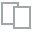
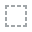
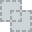
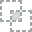
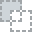
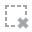
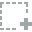
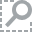
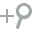
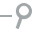
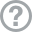
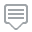
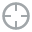
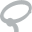
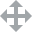
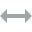
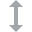
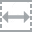
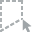
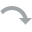
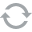
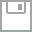
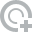
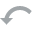
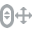
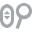
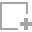
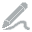
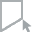
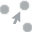
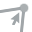
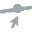

In [ ]:
!pip install dataprep
from dataprep.eda import plot
plot(df)

In [ ]:
# # Correlations between Features and Target

# Find all correlations and sort 
correlations_df = df.corr()['target'].sort_values()

# Print the most negative correlations
print(correlations_df.head(15), '\n')

# Print the most positive correlations
print(correlations_df.tail(15))

ps_ind_06_bin    -0.095833
ps_car_07_cat    -0.085838
ps_car_02_cat    -0.081661
ps_ind_16_bin    -0.071651
ps_ind_15        -0.061586
ps_car_08_cat    -0.046767
ps_ind_09_bin    -0.024183
ps_calc_19_bin   -0.016656
ps_car_14        -0.011491
ps_car_11        -0.005017
ps_calc_15_bin   -0.004823
ps_calc_12       -0.003125
ps_calc_18_bin   -0.003114
ps_calc_11       -0.002825
ps_ind_11_bin    -0.001556
Name: target, dtype: float64 

ps_ind_01        0.049021
ps_car_05_cat    0.054131
ps_reg_01        0.059321
ps_ind_05_cat    0.067652
ps_car_04_cat    0.073349
ps_car_15        0.079801
ps_car_03_cat    0.079892
ps_reg_03        0.085941
ps_ind_17_bin    0.087600
ps_reg_02        0.088040
ps_ind_07_bin    0.089944
ps_car_12        0.096340
ps_car_13        0.132217
id               0.758296
target           1.000000
Name: target, dtype: float64


In [ ]:
for i in df.columns:
    if len(set(df[i]))==1:
        df.drop(labels=[i], axis=1, inplace=True)

In [ ]:
# Find all correlations and sort 
correlations_df = df.corr()['target'].sort_values()

# Print the most negative correlations
print(correlations_df.head(15), '\n')

# Print the most positive correlations
print(correlations_df.tail(15))

ps_ind_06_bin    -0.095833
ps_car_07_cat    -0.085838
ps_car_02_cat    -0.081661
ps_ind_16_bin    -0.071651
ps_ind_15        -0.061586
ps_car_08_cat    -0.046767
ps_ind_09_bin    -0.024183
ps_calc_19_bin   -0.016656
ps_car_14        -0.011491
ps_car_11        -0.005017
ps_calc_15_bin   -0.004823
ps_calc_12       -0.003125
ps_calc_18_bin   -0.003114
ps_calc_11       -0.002825
ps_ind_11_bin    -0.001556
Name: target, dtype: float64 

ps_ind_01        0.049021
ps_car_05_cat    0.054131
ps_reg_01        0.059321
ps_ind_05_cat    0.067652
ps_car_04_cat    0.073349
ps_car_15        0.079801
ps_car_03_cat    0.079892
ps_reg_03        0.085941
ps_ind_17_bin    0.087600
ps_reg_02        0.088040
ps_ind_07_bin    0.089944
ps_car_12        0.096340
ps_car_13        0.132217
id               0.758296
target           1.000000
Name: target, dtype: float64


In [ ]:
df.shape

(42436, 59)

In [ ]:
# # # Feature Engineering and Selection

def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between loss
    y = x['target']
    x = x.drop(columns = ['target'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['target'] = y
               
    return x

In [ ]:
# Remove the collinear features above a specified correlation coefficient
data = remove_collinear_features(df, 0.6);

In [ ]:
df.shape

(42436, 59)

In [ ]:
# # # Split Into Training and Testing Sets

# Separate out the features and targets
features = data.drop(columns='target')
targets = pd.DataFrame(data['target'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33948, 54)
(8488, 54)
(33948, 1)
(8488, 1)


In [ ]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [ ]:
X_train

array([[-0.52343947, -0.48938058, -0.53986752, ..., -0.63947089,
         1.36292911, -0.41949183],
       [-0.80233887, -0.98644823, -0.53986752, ..., -0.63947089,
        -0.73371388, -0.41949183],
       [-0.76256532, -0.48938058,  0.95429705, ..., -0.63947089,
        -0.73371388, -0.41949183],
       ...,
       [-0.77428072,  0.00768707, -0.53986752, ..., -0.63947089,
         1.36292911, -0.41949183],
       [-0.76395119,  0.00768707, -0.53986752, ..., -0.63947089,
        -0.73371388, -0.41949183],
       [-0.72770474, -0.98644823, -0.53986752, ...,  1.56379285,
         1.36292911,  2.38383665]])

In [ ]:
X_test

array([[-0.7898004 , -0.98644823, -0.53986752, ..., -0.63947089,
        -0.73371388, -0.41949183],
       [ 1.86881343, -0.98644823,  2.44846162, ...,  1.56379285,
        -0.73371388, -0.41949183],
       [-0.73908373,  1.49889001, -0.53986752, ..., -0.63947089,
         1.36292911, -0.41949183],
       ...,
       [-0.73014431, -0.48938058, -0.53986752, ..., -0.63947089,
         1.36292911,  2.38383665],
       [ 1.41698435, -0.98644823,  0.95429705, ..., -0.63947089,
         1.36292911, -0.41949183],
       [ 0.36876778,  0.00768707,  0.95429705, ...,  1.56379285,
        -0.73371388, -0.41949183]])

In [ ]:
# # # Models to Evaluate

# We will compare five different machine learning Cassification models:

# 1 - Logistic Regression
# 2 - K-Nearest Neighbors Classification
# 3 - Suport Vector Machine
# 4 - Naive Bayes
# 5 - Random Forest Classification

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

In [ ]:
# # Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

Naive Bayes Performance on the test set: Cross Validation Score = 0.9564


In [ ]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.9814


In [ ]:
# # Gradiente Boosting Classification
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradiente Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

Gradiente Boosting Classification Performance on the test set: Cross Validation Score = 0.9816


# **Conclusion**
We did a fairly extensive check on the Auto Insurance dataset by checking for null values ​​and data, we investigated the linear correlation between features, examined some feature distributions, and implemented several training models (Random Forest, Gradient Boosting). (to identify features that the model considers important
)
as per the Naive Bayes,Random Forest Classification,Gradiente Boosting Classification evaluation the owner will initiate an auto insurance claim in the next year.